# Flourishing in the Workplace: Ayoub CHAMAKHI's project.

>[Flourishing in the Workplace: Ayoub CHAMAKHI's project.](#scrollTo=XWpr2gSKzcXe)

>[Part I - Set the Environment](#scrollTo=74hrga5h1JYm)

>>>[First things first, we start by loading all the relevant libraries.](#scrollTo=szAt5mp746zr)

>>>[We set the path to google drive folder.](#scrollTo=kuYtwHSb6Ry-)

>>>[We import the dataset.](#scrollTo=7Q89VfZf6gnc)

>[Part II - Clean the dataset](#scrollTo=VfCDjVUv6p4I)

>>>[We recode variables into the correct type.](#scrollTo=XGkyUsbn_iPG)

>>>[Double check that everything is well encoded](#scrollTo=EYBU5uaPCKgh)

>[Part III - Descriptive Statistics](#scrollTo=FZBKC8jYAFgN)

>>>[We analyse the univariate categorical variables.](#scrollTo=lNFBS6tCANC8)

>>>[We analyse the univariate numerical variables.](#scrollTo=P13RVhXNCdox)

>>>[We analyse the variables bivariately](#scrollTo=T_D1crXbGvvJ)

>>>[We check for multicolinearity across all variables](#scrollTo=vbfa28UVMo-k)

>[Part IV  - Modeling](#scrollTo=il2ELlSmaMUr)

>>>[Supervised on quantitative var](#scrollTo=tYgK45UpaQoC)

>>>[Supervised on categorical var](#scrollTo=sQ0cPV4UseHM)

>>>[Unsupervised learning on the variables (columns): PCA](#scrollTo=Ahj5qT6wDljg)

>>>[Unsupervised learning on the observations (rows): Use the variable obtained from PCA on KMEANs](#scrollTo=w6l297kteeh_)



# ***Part I - Set the Environment***


### First things first, we start by loading all the relevant libraries.

In [36]:
!pip install pingouin

In [37]:
!pip install factor_analyzer

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image

import pingouin as pg
import statsmodels.api as sm

from sklearn.cluster import KMeans
from scipy.stats import chi2_contingency, pearsonr, f_oneway
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.metrics import mean_squared_error, r2_score, classification_report, accuracy_score
from sklearn.decomposition import PCA
from factor_analyzer import FactorAnalyzer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity, calculate_kmo, FactorAnalyzer

import os

### We set the path to google drive folder.


In [39]:
from google.colab import drive
drive.mount('/content/drive')
os.getcwd()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


'/content/drive/My Drive/project_AyoubCHAMAKHI/datasets'

In [40]:
FOLDER_PATH = "/content/drive/MyDrive/Intro_to_ML/project_AyoubCHAMAKHI/datasets"

In [41]:
os.chdir(FOLDER_PATH)

### We import the dataset.

In [42]:
df = pd.read_excel("Flourishing_248_HD.xlsx", index_col = "ID")

In [43]:
df.head(3)

,age,education,sex,famstatus,pro_cat,pro_quant,priv_cat,priv_quant,positivity,flow
ID,,,,,,,,,,
344,72,6,2,2,3,82,3,83,4.142857,44
317,45,6,2,2,3,81,3,83,4.000000,44
444,43,5,1,1,3,79,3,78,5.000000,47


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 248 entries, 344 to 26
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   age         248 non-null    int64  
 1   education   248 non-null    int64  
 2   sex         248 non-null    int64  
 3   famstatus   248 non-null    int64  
 4   pro_cat     248 non-null    int64  
 5   pro_quant   248 non-null    int64  
 6   priv_cat    248 non-null    int64  
 7   priv_quant  248 non-null    int64  
 8   positivity  248 non-null    float64
 9   flow        248 non-null    int64  
dtypes: float64(1), int64(9)
memory usage: 21.3 KB


# ***Part II - Clean the dataset***




### We recode variables into the correct type.

**Categorical variables:** sex, famstatus, prof_cat, priv_cat, positivity, education_cat

**Numerical variables:** age, education_num, pro_quant, priv_quant, flow

In [45]:
df.describe()

,age,education,sex,famstatus,pro_cat,pro_quant,priv_cat,priv_quant,positivity,flow
count,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000
mean,41.685484,4.616935,1.608871,2.536290,2.052419,50.612903,2.225806,55.987903,1.812982,32.951613
std,10.154568,1.538453,0.488990,0.757348,0.597967,13.431614,0.537481,11.613367,0.803469,6.599417
min,20.000000,1.000000,1.000000,1.000000,1.000000,21.000000,1.000000,23.000000,0.384615,13.000000
25%,34.000000,3.000000,1.000000,2.000000,2.000000,41.000000,2.000000,48.000000,1.272727,29.000000
50%,40.000000,5.000000,2.000000,3.000000,2.000000,50.000000,2.000000,56.000000,1.720000,33.000000
75%,49.000000,6.000000,2.000000,3.000000,2.000000,61.000000,3.000000,64.000000,2.170455,37.000000
max,72.000000,6.000000,2.000000,3.000000,3.000000,82.000000,3.000000,83.000000,5.000000,48.000000


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 248 entries, 344 to 26
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   age         248 non-null    int64  
 1   education   248 non-null    int64  
 2   sex         248 non-null    int64  
 3   famstatus   248 non-null    int64  
 4   pro_cat     248 non-null    int64  
 5   pro_quant   248 non-null    int64  
 6   priv_cat    248 non-null    int64  
 7   priv_quant  248 non-null    int64  
 8   positivity  248 non-null    float64
 9   flow        248 non-null    int64  
dtypes: float64(1), int64(9)
memory usage: 21.3 KB


In [47]:
df.isna().sum()

,0
age,0
education,0
sex,0
famstatus,0
pro_cat,0
pro_quant,0
priv_cat,0
priv_quant,0
positivity,0
flow,0


In [48]:
df.rename(columns={"education" : "education_num"}, inplace = True)
cat_vars = ["education_cat", "sex", "famstatus", "pro_cat", "priv_cat", "positivity"]
num_vars = ["age", "pro_quant", "priv_quant", "flow", "education_num"]

In [49]:
df["positivity"] = np.where(df["positivity"] <= 1, "depressed",
                   np.where((df["positivity"] > 1) & (df["positivity"] <= 2), "languishing",
                   np.where((df["positivity"] > 2) & (df["positivity"] <= 3), "moderately emotionally healthy",
                   np.where(df["positivity"] > 3, "emotionally flourishing", None))))

In [50]:
df["sex"] = np.where(df["sex"] == 1, "Male",
                              np.where(df["sex"] == 2, "Female", None))

In [51]:
df["pro_cat"] = np.where(df["pro_cat"] == 1, "Languishing",
                              np.where(df["pro_cat"] == 2, "Moderately Mentally Healthy",
                              np.where(df["pro_cat"] == 3, "Flourishing", None )))

In [52]:
df["priv_cat"] = np.where(df["priv_cat"] == 1, "Languishing",
                              np.where(df["priv_cat"] == 2, "Moderately Mentally Healthy",
                              np.where(df["priv_cat"] == 3, "Flourishing", None )))

In [53]:
df["famstatus"] = np.where(df["famstatus"] == 1, "Single",
                              np.where(df["famstatus"] == 2, "Seperate / Divorced",
                              np.where(df["famstatus"] == 3, "Couple", None )))

In [54]:
df["education_cat"] = np.where(df["education_num"] == 1, "No HS",
                              np.where(df["education_num"] == 2, "HS",
                              np.where(df["education_num"] == 3, "≤2yr Post",
                              np.where(df["education_num"] == 4, "≤3yr Post",
                              np.where(df["education_num"] == 5, "≤4yr Post",
                              np.where(df["education_num"] == 6, "≤5yr Post", None))))))

In [55]:
df["age"] = df["age"].astype(int)
df["education_num"] = df["education_num"].astype(int)
df["pro_quant"] = df["pro_quant"].astype(int)
df["priv_quant"] = df["priv_quant"].astype(int)
df["flow"] = df["flow"].astype(int)

### Double check that everything is well encoded

In [56]:
for unique in df.columns:
  print(unique, df[unique].unique())

age [72 45 43 60 49 35 51 32 20 41 38 33 62 55 34 37 58 50 59 57 67 46 48 42
 44 54 30 53 47 64 27 28 23 25 31 40 39 36 56 52 63 61 66 29]
education_num [6 5 2 4 3 1]
sex ['Female' 'Male']
famstatus ['Seperate / Divorced' 'Single' 'Couple']
pro_cat ['Flourishing' 'Moderately Mentally Healthy' 'Languishing']
pro_quant [82 81 79 77 75 74 71 69 70 66 68 67 76 73 72 65 63 64 61 60 59 39 37 40
 41 38 36 35 33 31 58 57 53 51 49 56 55 54 52 50 48 46 47 45 43 44 42 62
 24 34 30 28 29 32 25 23 22 21]
priv_cat ['Flourishing' 'Moderately Mentally Healthy' 'Languishing']
priv_quant [83 78 82 73 76 72 74 75 69 70 71 57 59 47 58 65 68 64 67 39 62 52 55 60
 66 61 63 48 41 49 45 54 38 56 44 40 23 27 36 53 42 43 50 51 32 46 37 34
 35 33 25 28]
positivity ['emotionally flourishing' 'moderately emotionally healthy' 'languishing'
 'depressed']
flow [44 47 42 33 36 45 41 48 38 34 37 39 40 35 29 27 32 28 43 30 26 24 22 21
 14 18 25 31 16 23 46 13 20]
education_cat ['≤5yr Post' '≤4yr Post' 'HS' '≤3yr Post' '

In [57]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 248 entries, 344 to 26
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            248 non-null    int64 
 1   education_num  248 non-null    int64 
 2   sex            248 non-null    object
 3   famstatus      248 non-null    object
 4   pro_cat        248 non-null    object
 5   pro_quant      248 non-null    int64 
 6   priv_cat       248 non-null    object
 7   priv_quant     248 non-null    int64 
 8   positivity     248 non-null    object
 9   flow           248 non-null    int64 
 10  education_cat  248 non-null    object
dtypes: int64(5), object(6)
memory usage: 23.2+ KB
None


# ***Part III - Descriptive Statistics***

### We analyse the univariate categorical variables.

Summary Table for education_cat:
   education_cat  Frequency  Percentage
0     ≤5yr Post        110   44.354839
1     ≤4yr Post         39   15.725806
2     ≤2yr Post         39   15.725806
3     ≤3yr Post         31   12.500000
4            HS         20    8.064516
5         No HS          9    3.629032 



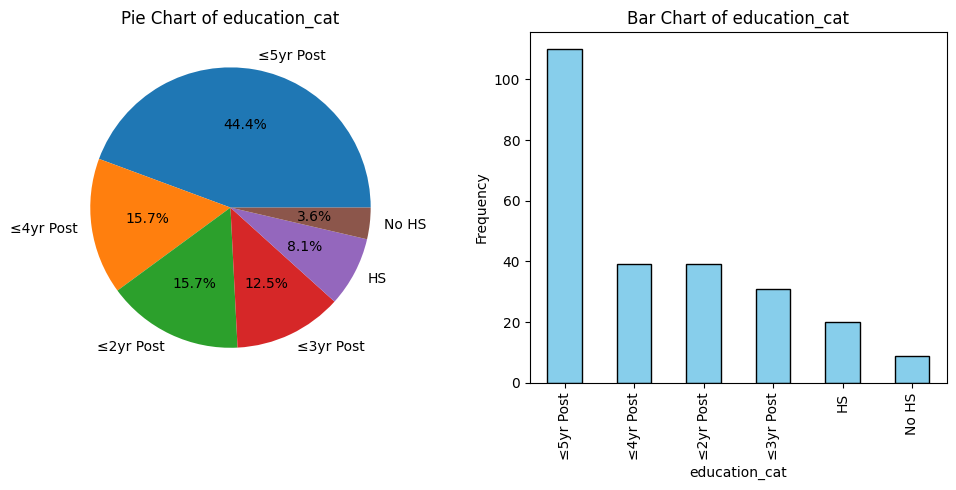

Summary Table for sex:
       sex  Frequency  Percentage
0  Female        151   60.887097
1    Male         97   39.112903 



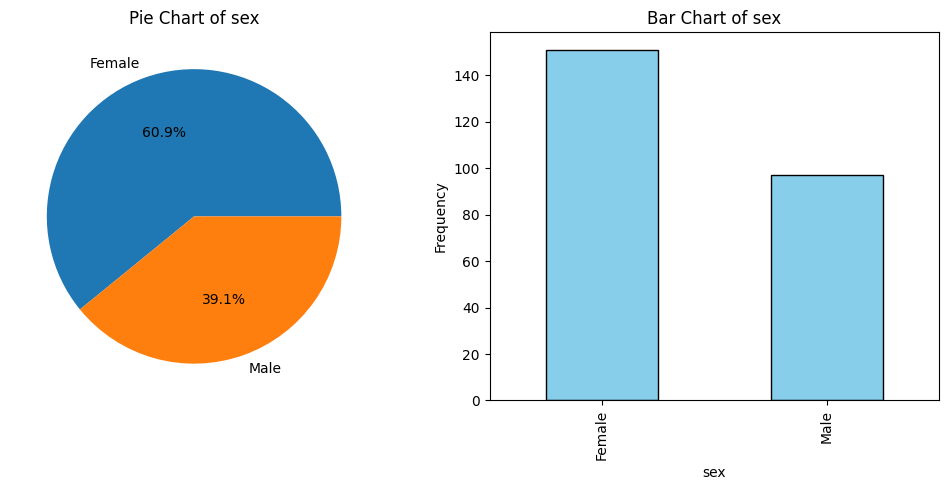

Summary Table for famstatus:
              famstatus  Frequency  Percentage
0               Couple        173   69.758065
1               Single         40   16.129032
2  Seperate / Divorced         35   14.112903 



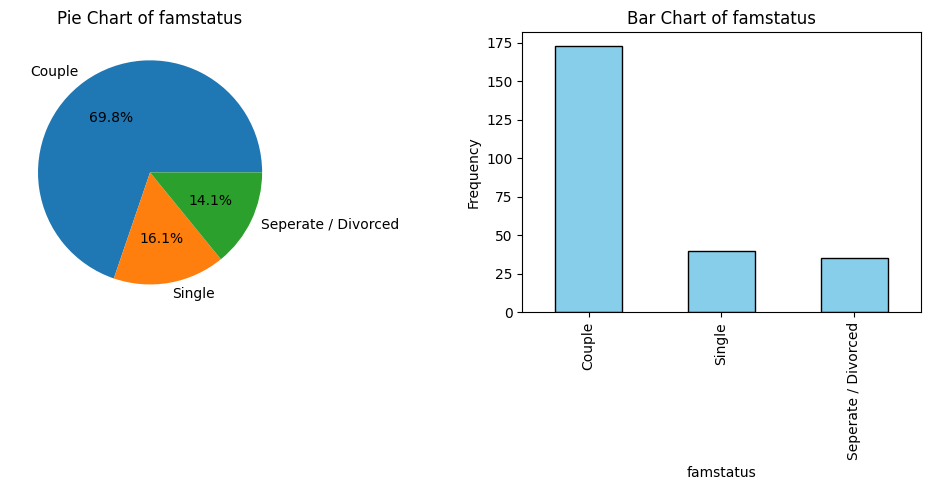

Summary Table for pro_cat:
                        pro_cat  Frequency  Percentage
0  Moderately Mentally Healthy        159   64.112903
1                  Flourishing         51   20.564516
2                  Languishing         38   15.322581 



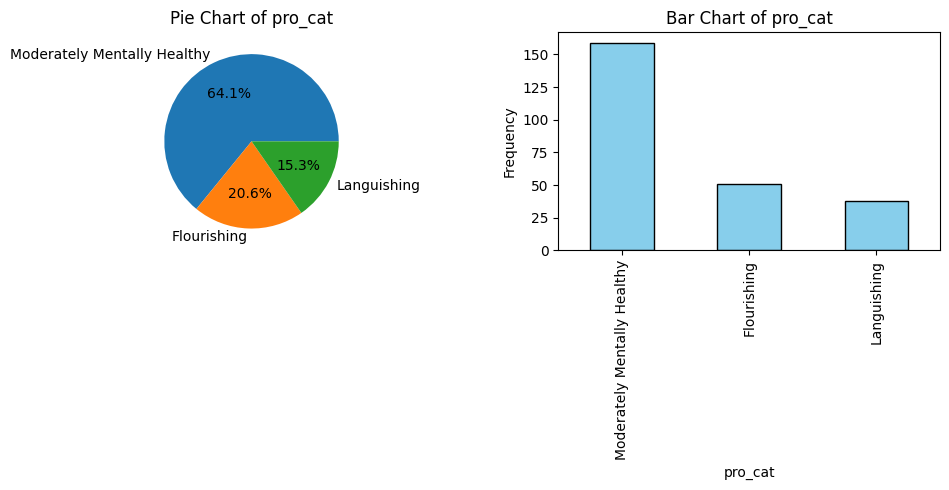

Summary Table for priv_cat:
                       priv_cat  Frequency  Percentage
0  Moderately Mentally Healthy        164   66.129032
1                  Flourishing         70   28.225806
2                  Languishing         14    5.645161 



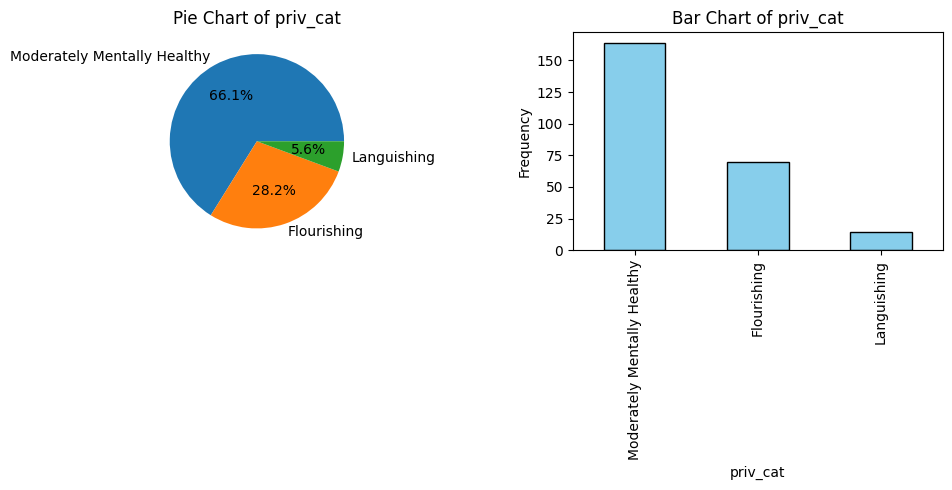

Summary Table for positivity:
                        positivity  Frequency  Percentage
0                     languishing        148   59.677419
1  moderately emotionally healthy         50   20.161290
2                       depressed         30   12.096774
3         emotionally flourishing         20    8.064516 



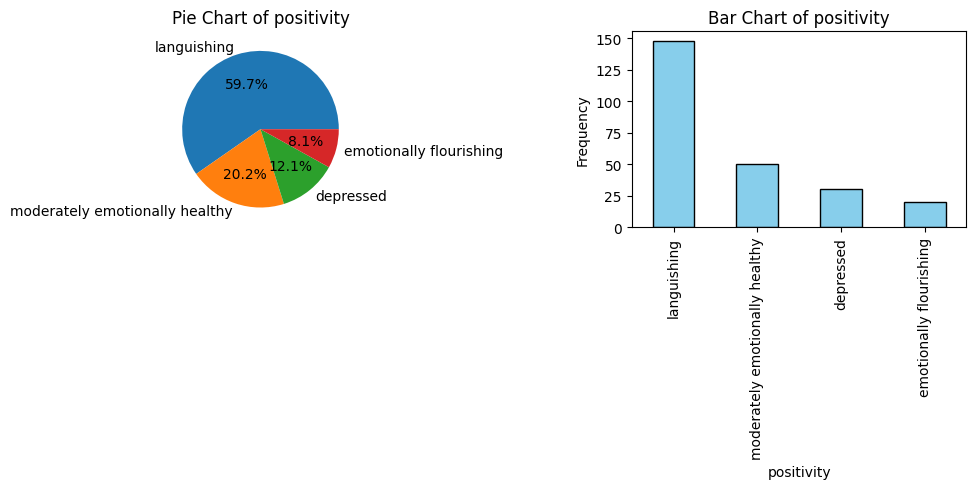

In [58]:
def uni_cat_analysis(data, cat_vars):
    summary_tables = {}

    for var in cat_vars:
        #summary table
        summary_table = data[var].value_counts().reset_index()
        summary_table.columns = [var, 'Frequency']
        summary_table['Percentage'] = (summary_table['Frequency'] / len(data)) * 100
        summary_tables[var] = summary_table
        print(f"Summary Table for {var}:\n", summary_table, "\n")

        plt.figure(figsize=(10, 5))

        #pie chart
        plt.subplot(1, 2, 1)
        plt.pie(data[var].value_counts(), labels=data[var].value_counts().index, autopct='%1.1f%%')
        plt.title(f'Pie Chart of {var}')

        #bar chart
        plt.subplot(1, 2, 2)
        data[var].value_counts().plot(kind='bar', color='skyblue', edgecolor='black')
        plt.title(f'Bar Chart of {var}')
        plt.xlabel(var)
        plt.ylabel('Frequency')

        plt.tight_layout()
        plt.show()

    return summary_tables

summary_tables = uni_cat_analysis(df, cat_vars)

### We analyse the univariate numerical variables.

Frequency Table for age:
     age  Frequency  Percentage
0    40         14    5.645161
1    32         13    5.241935
2    38         13    5.241935
3    39         11    4.435484
4    41         11    4.435484
5    33         10    4.032258
6    48         10    4.032258
7    35          9    3.629032
8    34          9    3.629032
9    31          9    3.629032
10   57          8    3.225806
11   30          8    3.225806
12   37          8    3.225806
13   50          7    2.822581
14   28          7    2.822581
15   45          7    2.822581
16   46          7    2.822581
17   43          6    2.419355
18   36          6    2.419355
19   49          6    2.419355
20   59          5    2.016129
21   55          5    2.016129
22   42          5    2.016129
23   27          5    2.016129
24   52          4    1.612903
25   44          4    1.612903
26   54          4    1.612903
27   62          4    1.612903
28   53          4    1.612903
29   47          4    1.612903
30   23      

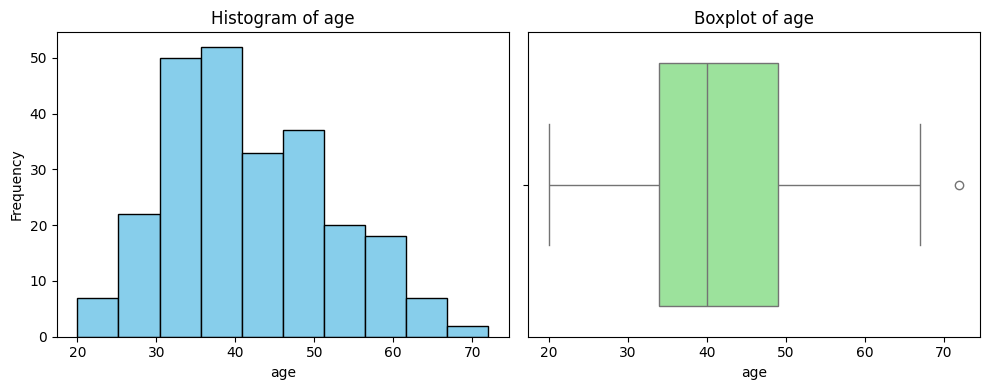

Frequency Table for pro_quant:
     pro_quant  Frequency  Percentage
0          43         11    4.435484
1          46         10    4.032258
2          66         10    4.032258
3          49          9    3.629032
4          58          9    3.629032
5          51          9    3.629032
6          61          8    3.225806
7          44          8    3.225806
8          47          8    3.225806
9          56          7    2.822581
10         39          7    2.822581
11         37          6    2.419355
12         53          6    2.419355
13         57          6    2.419355
14         63          6    2.419355
15         35          6    2.419355
16         41          6    2.419355
17         31          6    2.419355
18         55          5    2.016129
19         50          5    2.016129
20         48          5    2.016129
21         42          5    2.016129
22         36          5    2.016129
23         54          4    1.612903
24         45          4    1.612903
25    

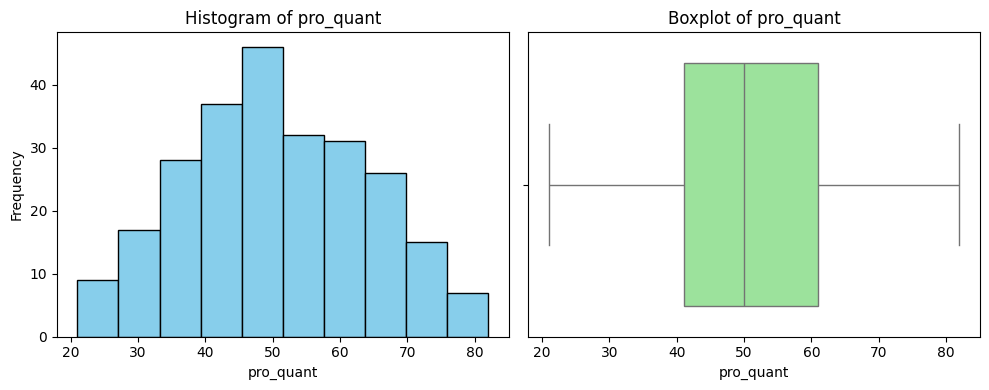

Frequency Table for priv_quant:
     priv_quant  Frequency  Percentage
0           61         11    4.435484
1           62         11    4.435484
2           49         10    4.032258
3           48         10    4.032258
4           55         10    4.032258
5           63          8    3.225806
6           64          8    3.225806
7           56          8    3.225806
8           52          8    3.225806
9           67          8    3.225806
10          53          8    3.225806
11          69          8    3.225806
12          59          7    2.822581
13          65          7    2.822581
14          54          7    2.822581
15          45          7    2.822581
16          47          6    2.419355
17          44          6    2.419355
18          68          6    2.419355
19          38          6    2.419355
20          41          6    2.419355
21          60          6    2.419355
22          57          5    2.016129
23          72          5    2.016129
24          66   

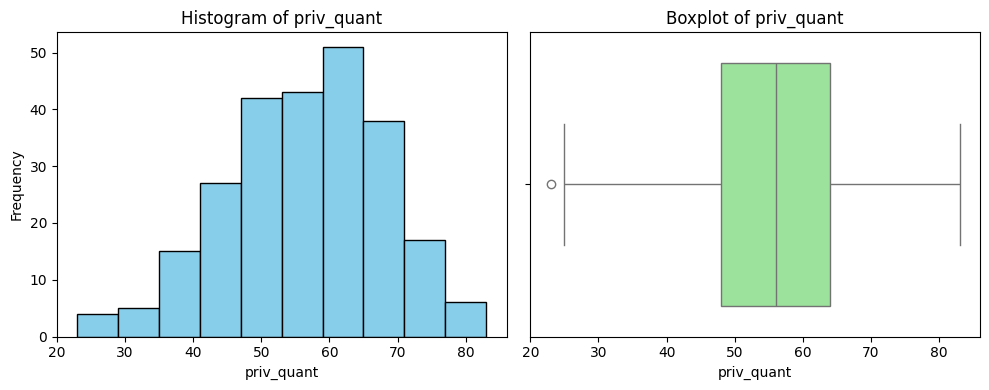

Frequency Table for flow:
     flow  Frequency  Percentage
0     37         20    8.064516
1     33         18    7.258065
2     30         18    7.258065
3     29         16    6.451613
4     35         14    5.645161
5     31         12    4.838710
6     39         12    4.838710
7     32         11    4.435484
8     36         11    4.435484
9     26         10    4.032258
10    38         10    4.032258
11    40         10    4.032258
12    28          9    3.629032
13    34          9    3.629032
14    44          8    3.225806
15    27          7    2.822581
16    21          7    2.822581
17    23          6    2.419355
18    25          6    2.419355
19    42          6    2.419355
20    41          5    2.016129
21    24          5    2.016129
22    48          3    1.209677
23    43          3    1.209677
24    22          3    1.209677
25    47          2    0.806452
26    13          1    0.403226
27    46          1    0.403226
28    14          1    0.403226
29    16     

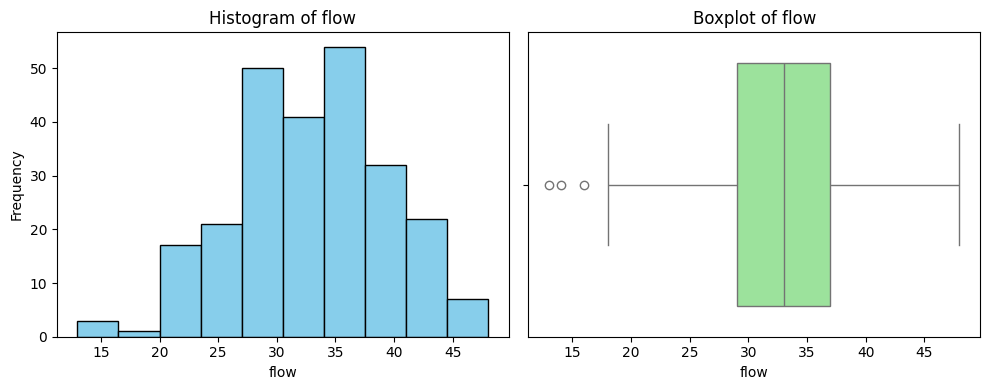

Frequency Table for education_num:
    education_num  Frequency  Percentage
0              6        110   44.354839
1              5         39   15.725806
2              3         39   15.725806
3              4         31   12.500000
4              2         20    8.064516
5              1          9    3.629032 



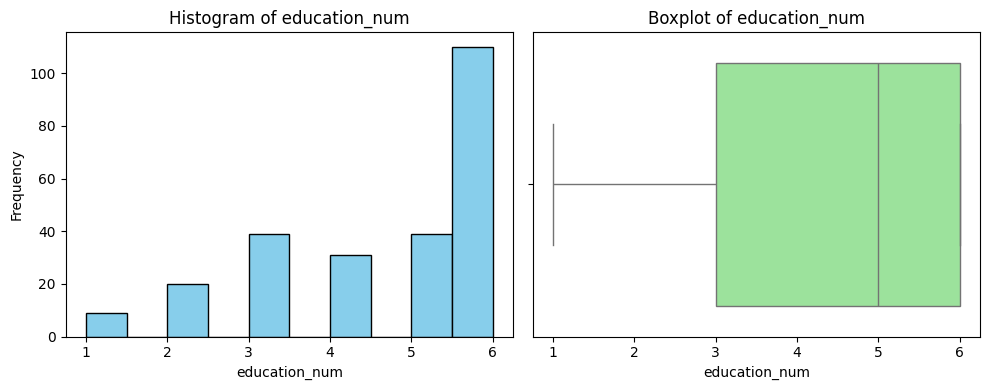

In [59]:
def uni_num_analysis(data, num_vars):
    frequency_tables = {}

    for var in num_vars:
        #frequency table
        frequency_table = data[var].value_counts().reset_index()
        frequency_table.columns = [var, 'Frequency']
        frequency_table['Percentage'] = (frequency_table['Frequency'] / len(data)) * 100
        frequency_tables[var] = frequency_table
        print(f"Frequency Table for {var}:\n", frequency_table, "\n")

        plt.figure(figsize=(10, 4))

        #histogram
        plt.subplot(1, 2, 1)
        plt.hist(data[var], bins=10, color='skyblue', edgecolor='black')
        plt.title(f'Histogram of {var}')
        plt.xlabel(var)
        plt.ylabel('Frequency')

        #boxplot
        plt.subplot(1, 2, 2)
        sns.boxplot(x=data[var], color='lightgreen')
        plt.title(f'Boxplot of {var}')

        plt.tight_layout()
        plt.show()

    return frequency_tables

freq_tables = uni_num_analysis(df, num_vars)

### We analyse the variables bivariately

***Most of the histograms of previous graphs seem to be normally distributed, hence we will stick to pearson correlation.***

Analyzing sex and age (Mixed Categorical & Quantitative)
ANOVA:
F-statistic = 0.40149335527752095, p-value = 0.5269077121187967

Group means:
sex
Female    41.357616
Male      42.195876
Name: age, dtype: float64



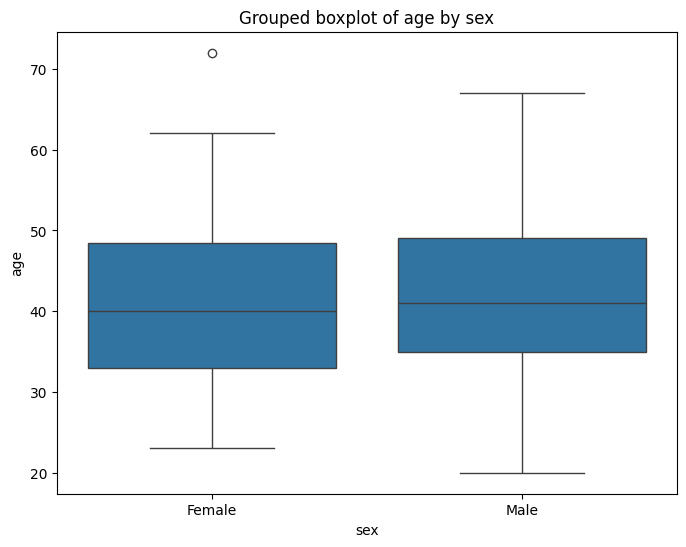

Analyzing sex and pro_quant (Mixed Categorical & Quantitative)
ANOVA:
F-statistic = 0.8563289565133827, p-value = 0.3556749365770713

Group means:
sex
Female    49.980132
Male      51.597938
Name: pro_quant, dtype: float64



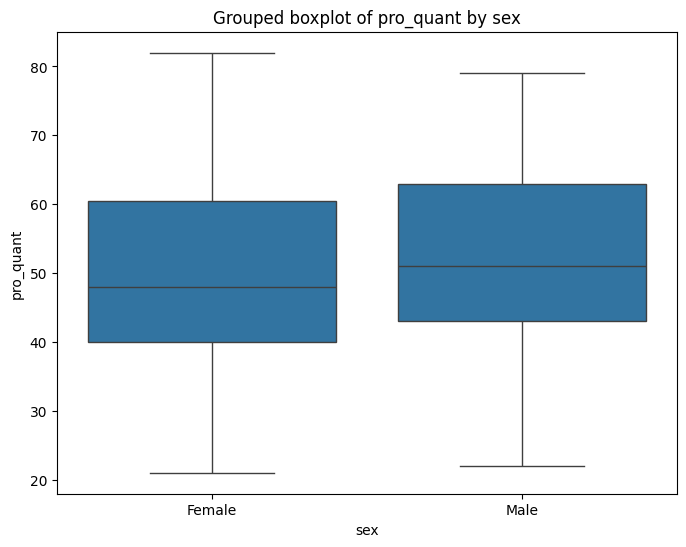

Analyzing sex and priv_quant (Mixed Categorical & Quantitative)
ANOVA:
F-statistic = 0.015610689413731636, p-value = 0.9006709179497444

Group means:
sex
Female    55.913907
Male      56.103093
Name: priv_quant, dtype: float64



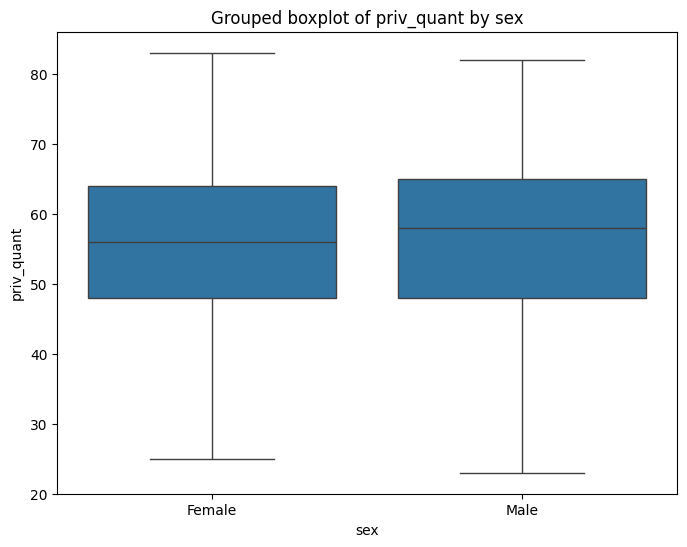

Analyzing sex and flow (Mixed Categorical & Quantitative)
ANOVA:
F-statistic = 0.4836053338827953, p-value = 0.4874501604405136

Group means:
sex
Female    33.185430
Male      32.587629
Name: flow, dtype: float64



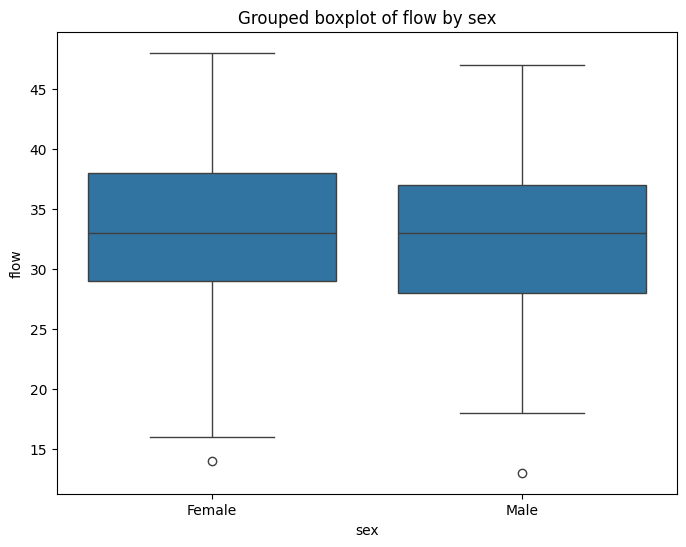

Analyzing famstatus and age (Mixed Categorical & Quantitative)
ANOVA:
F-statistic = 15.963232540676795, p-value = 3.0422768747014055e-07

Group means:
famstatus
Couple                 41.433526
Seperate / Divorced    48.914286
Single                 36.450000
Name: age, dtype: float64



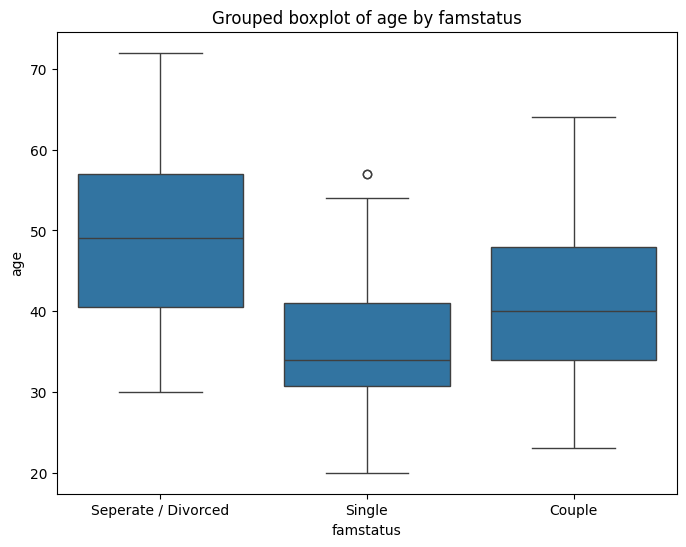

Analyzing famstatus and pro_quant (Mixed Categorical & Quantitative)
ANOVA:
F-statistic = 0.2928963357236913, p-value = 0.7463603618049064

Group means:
famstatus
Couple                 50.988439
Seperate / Divorced    50.371429
Single                 49.200000
Name: pro_quant, dtype: float64



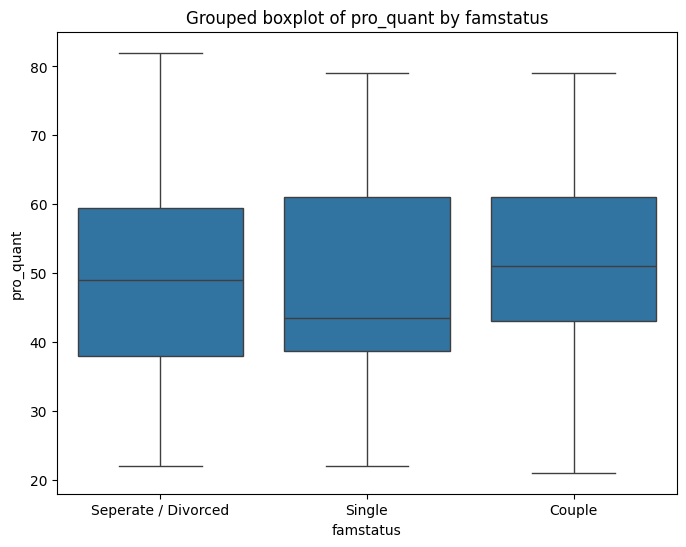

Analyzing famstatus and priv_quant (Mixed Categorical & Quantitative)
ANOVA:
F-statistic = 3.873111519819784, p-value = 0.022078660765379055

Group means:
famstatus
Couple                 57.260116
Seperate / Divorced    54.257143
Single                 52.000000
Name: priv_quant, dtype: float64



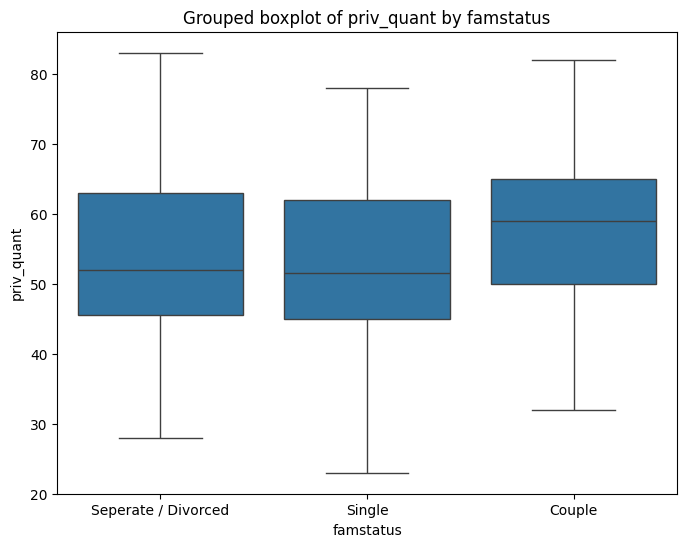

Analyzing famstatus and flow (Mixed Categorical & Quantitative)
ANOVA:
F-statistic = 1.6892796894376303, p-value = 0.1867960201258167

Group means:
famstatus
Couple                 33.289017
Seperate / Divorced    33.285714
Single                 31.200000
Name: flow, dtype: float64



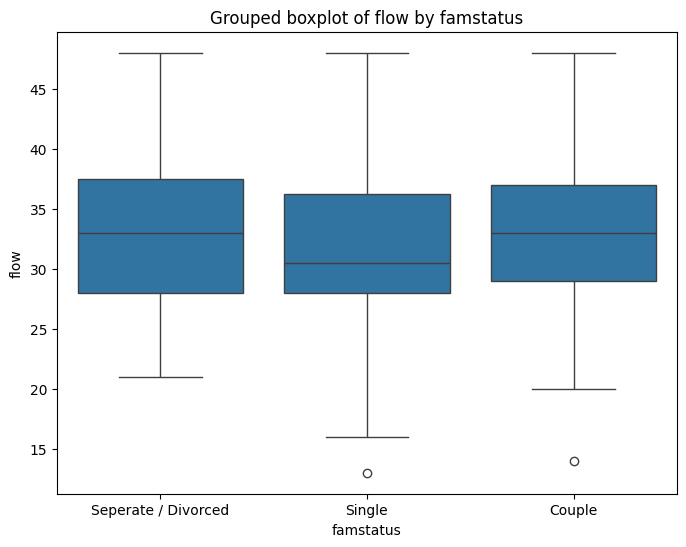

Analyzing pro_cat and age (Mixed Categorical & Quantitative)
ANOVA:
F-statistic = 4.854055421223829, p-value = 0.008562595571238018

Group means:
pro_cat
Flourishing                    45.490196
Languishing                    39.763158
Moderately Mentally Healthy    40.924528
Name: age, dtype: float64



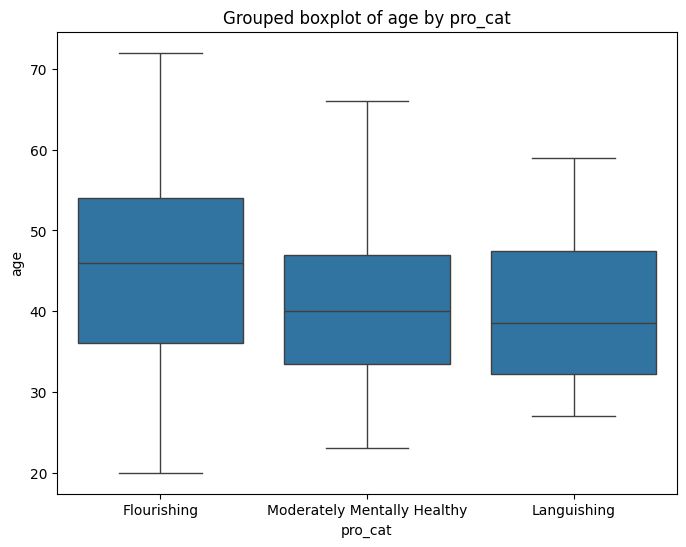

Analyzing pro_cat and pro_quant (Mixed Categorical & Quantitative)
ANOVA:
F-statistic = 324.46127773043565, p-value = 1.3759673580446063e-69

Group means:
pro_cat
Flourishing                    69.235294
Languishing                    31.157895
Moderately Mentally Healthy    49.289308
Name: pro_quant, dtype: float64



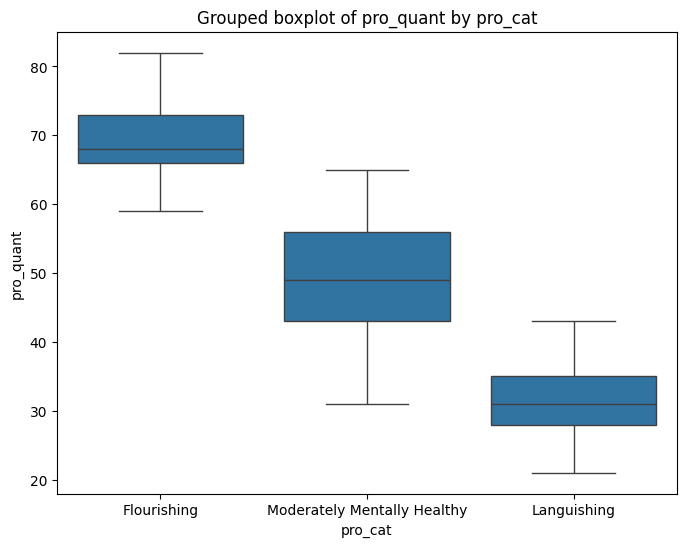

Analyzing pro_cat and priv_quant (Mixed Categorical & Quantitative)
ANOVA:
F-statistic = 55.1229519952276, p-value = 1.7101457864744627e-20

Group means:
pro_cat
Flourishing                    66.627451
Languishing                    45.157895
Moderately Mentally Healthy    55.163522
Name: priv_quant, dtype: float64



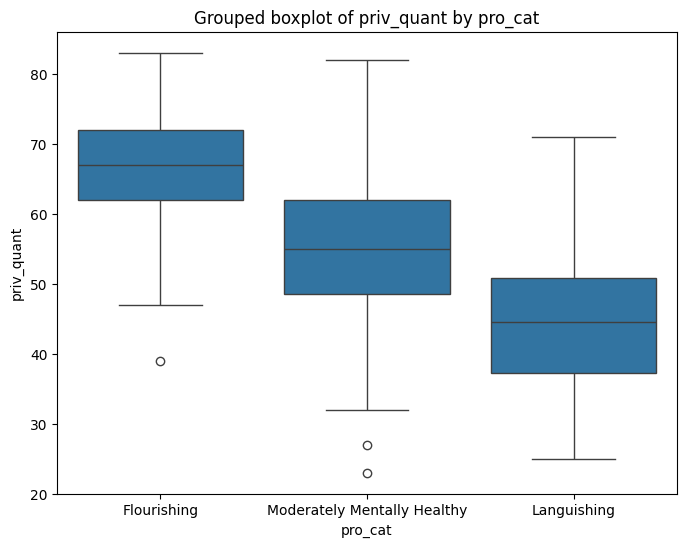

Analyzing pro_cat and flow (Mixed Categorical & Quantitative)
ANOVA:
F-statistic = 28.050154355736876, p-value = 1.0733052122974718e-11

Group means:
pro_cat
Flourishing                    38.098039
Languishing                    29.078947
Moderately Mentally Healthy    32.226415
Name: flow, dtype: float64



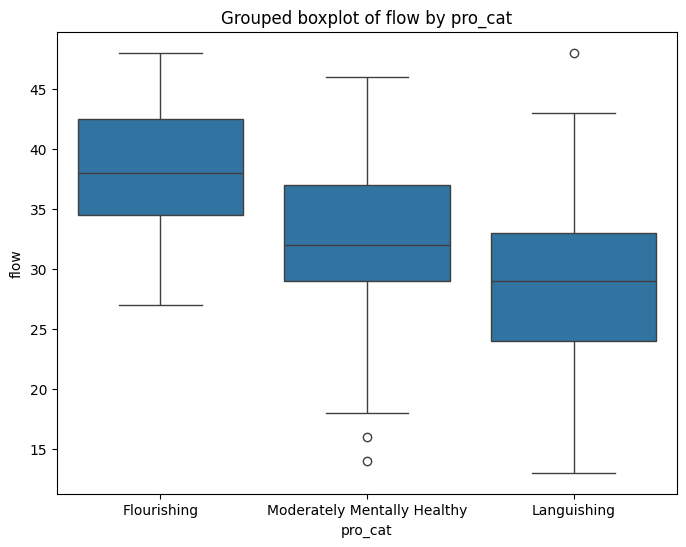

Analyzing priv_cat and age (Mixed Categorical & Quantitative)
ANOVA:
F-statistic = 3.372025131072251, p-value = 0.03592042552735478

Group means:
priv_cat
Flourishing                    44.300000
Languishing                    39.642857
Moderately Mentally Healthy    40.743902
Name: age, dtype: float64



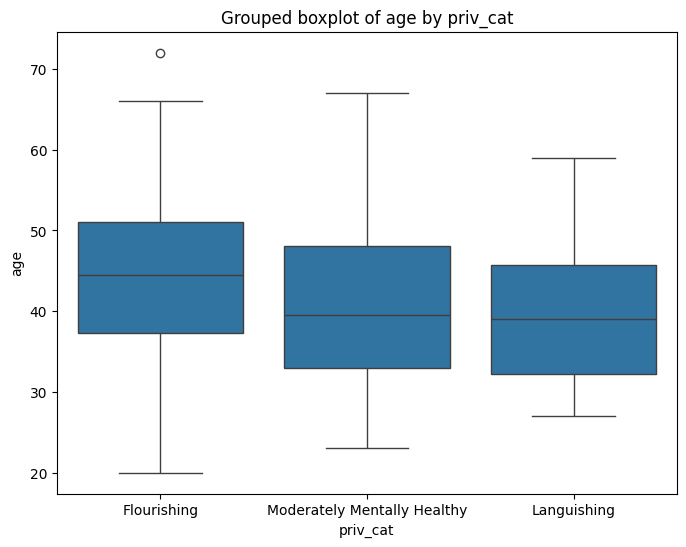

Analyzing priv_cat and pro_quant (Mixed Categorical & Quantitative)
ANOVA:
F-statistic = 40.237463611945365, p-value = 7.752590783333874e-16

Group means:
priv_cat
Flourishing                    60.571429
Languishing                    37.285714
Moderately Mentally Healthy    47.500000
Name: pro_quant, dtype: float64



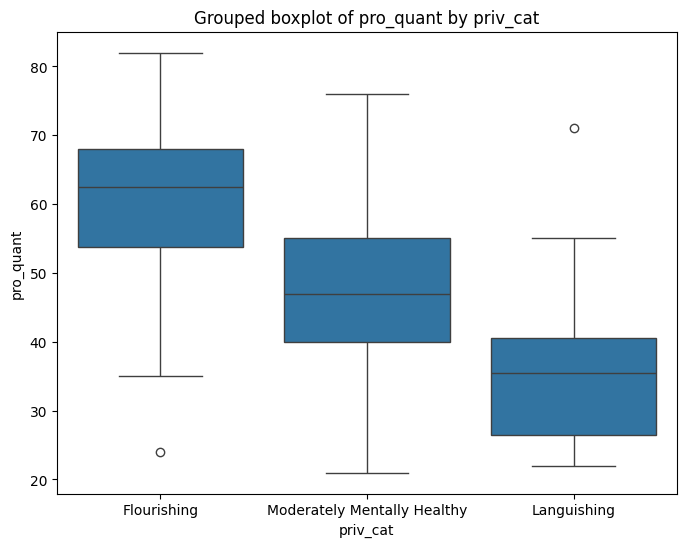

Analyzing priv_cat and priv_quant (Mixed Categorical & Quantitative)
ANOVA:
F-statistic = 204.53826511387143, p-value = 5.73252567848091e-53

Group means:
priv_cat
Flourishing                    68.700000
Languishing                    32.714286
Moderately Mentally Healthy    52.548780
Name: priv_quant, dtype: float64



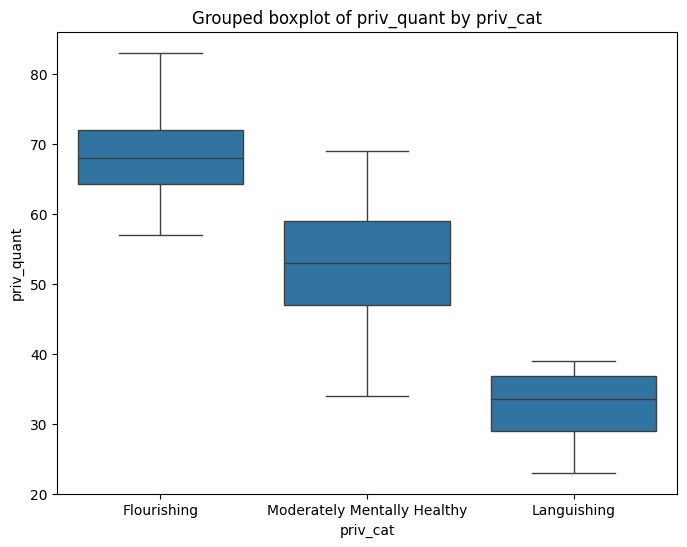

Analyzing priv_cat and flow (Mixed Categorical & Quantitative)
ANOVA:
F-statistic = 16.81684846559849, p-value = 1.432929333500006e-07

Group means:
priv_cat
Flourishing                    36.142857
Languishing                    27.214286
Moderately Mentally Healthy    32.079268
Name: flow, dtype: float64



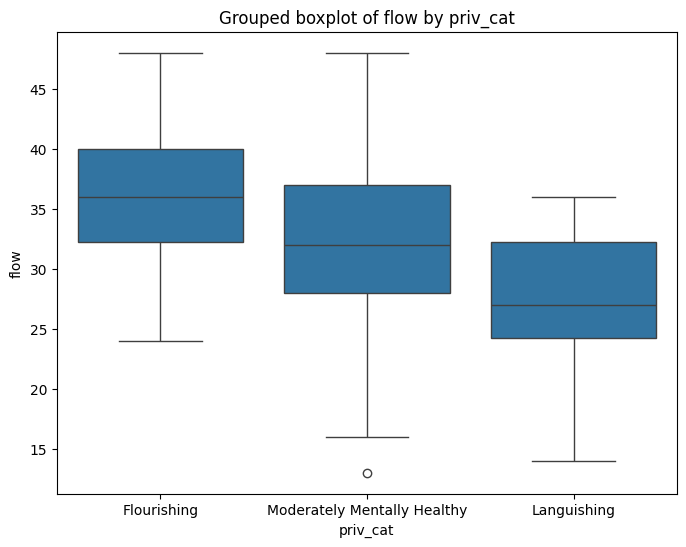

Analyzing positivity and age (Mixed Categorical & Quantitative)
ANOVA:
F-statistic = 5.35030301528283, p-value = 0.0013846322831845242

Group means:
positivity
depressed                         40.366667
emotionally flourishing           48.600000
languishing                       40.250000
moderately emotionally healthy    43.960000
Name: age, dtype: float64



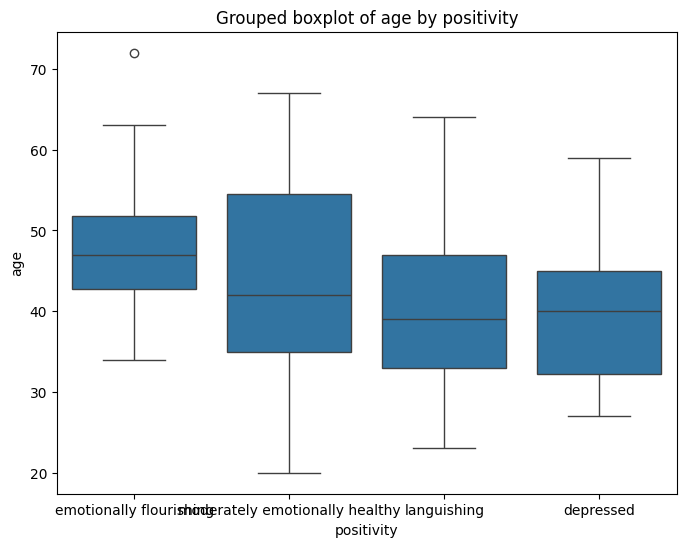

Analyzing positivity and pro_quant (Mixed Categorical & Quantitative)
ANOVA:
F-statistic = 41.50616166249445, p-value = 1.0430371350467964e-21

Group means:
positivity
depressed                         36.933333
emotionally flourishing           63.900000
languishing                       48.195946
moderately emotionally healthy    60.660000
Name: pro_quant, dtype: float64



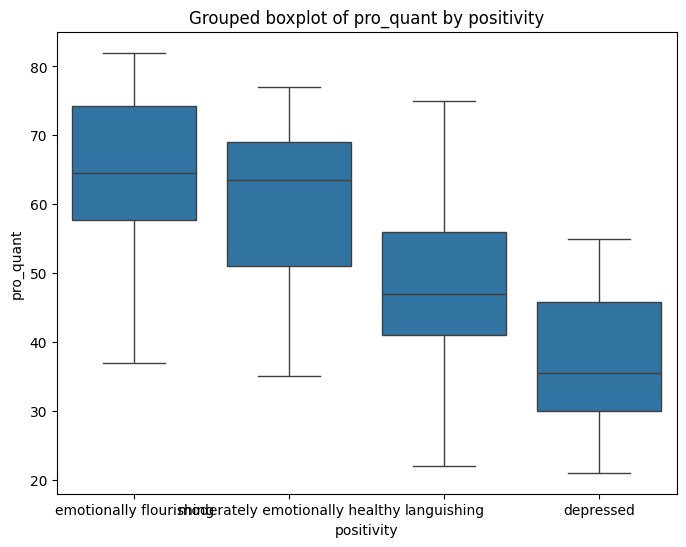

Analyzing positivity and priv_quant (Mixed Categorical & Quantitative)
ANOVA:
F-statistic = 44.804494443700165, p-value = 4.217041680687891e-23

Group means:
positivity
depressed                         43.100000
emotionally flourishing           67.700000
languishing                       54.148649
moderately emotionally healthy    64.480000
Name: priv_quant, dtype: float64



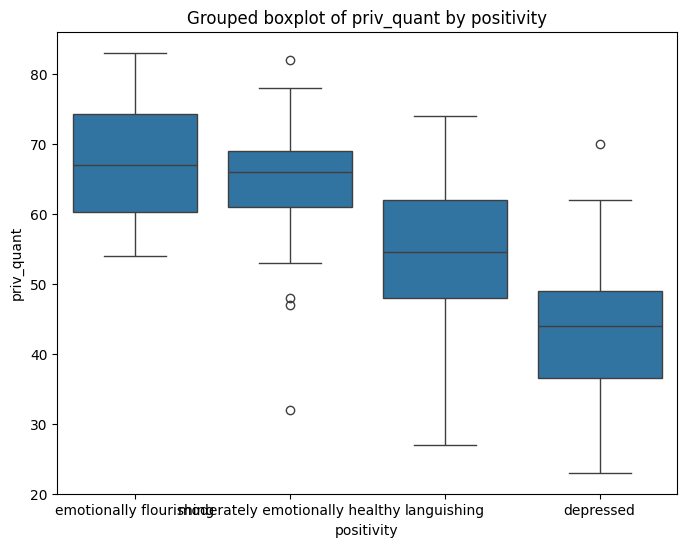

Analyzing positivity and flow (Mixed Categorical & Quantitative)
ANOVA:
F-statistic = 20.448791041750123, p-value = 7.450157321305603e-12

Group means:
positivity
depressed                         27.300000
emotionally flourishing           38.250000
languishing                       32.243243
moderately emotionally healthy    36.320000
Name: flow, dtype: float64



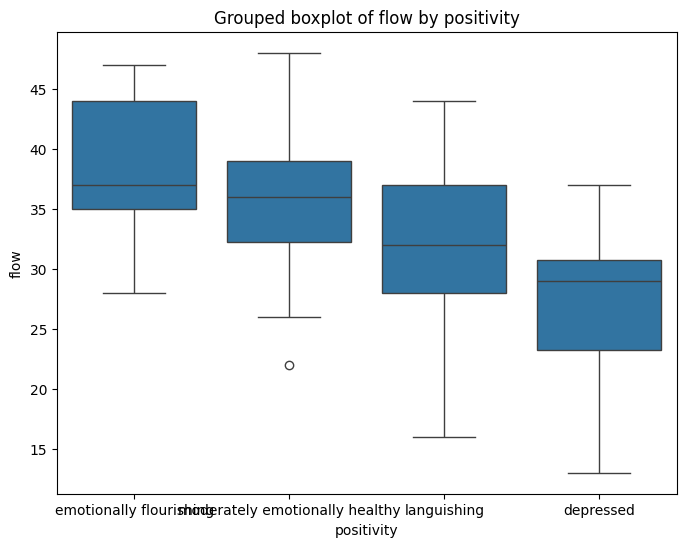

Analyzing education_cat and sex (Both Categorical)
Contingency table:
sex            Female  Male
education_cat              
HS                 12     8
No HS               5     4
≤2yr Post          23    16
≤3yr Post          22     9
≤4yr Post          22    17
≤5yr Post          67    43

Chi-square Test:
Chi2 Stat = 1.8249843705978068, p-value = 0.872792808219094

Cramer's V = 0.08578349460099477



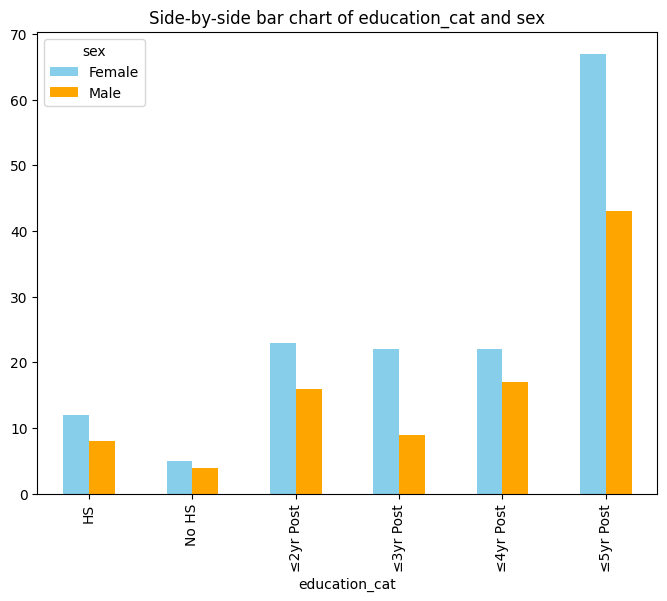

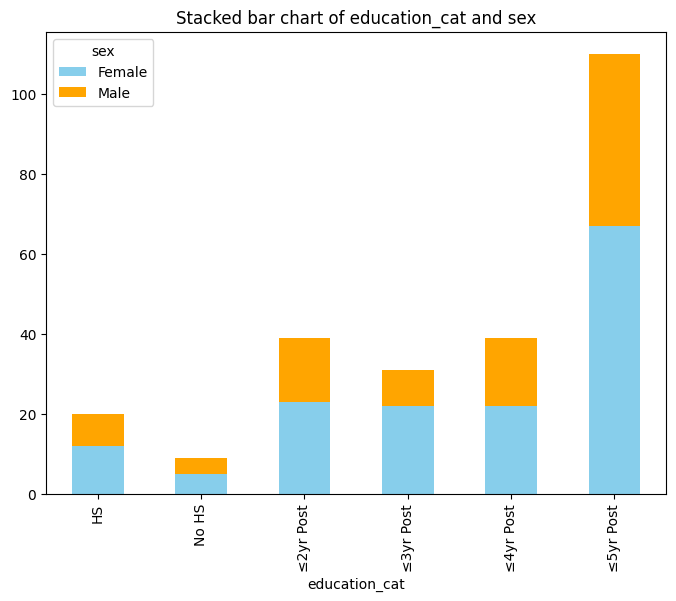

Analyzing education_cat and famstatus (Both Categorical)
Contingency table:
famstatus      Couple  Seperate / Divorced  Single
education_cat                                     
HS                 10                    4       6
No HS               7                    1       1
≤2yr Post          27                    7       5
≤3yr Post          18                    7       6
≤4yr Post          27                    6       6
≤5yr Post          84                   10      16

Chi-square Test:
Chi2 Stat = 10.21710854335132, p-value = 0.42165665979460953

Cramer's V = 0.14352354914780535



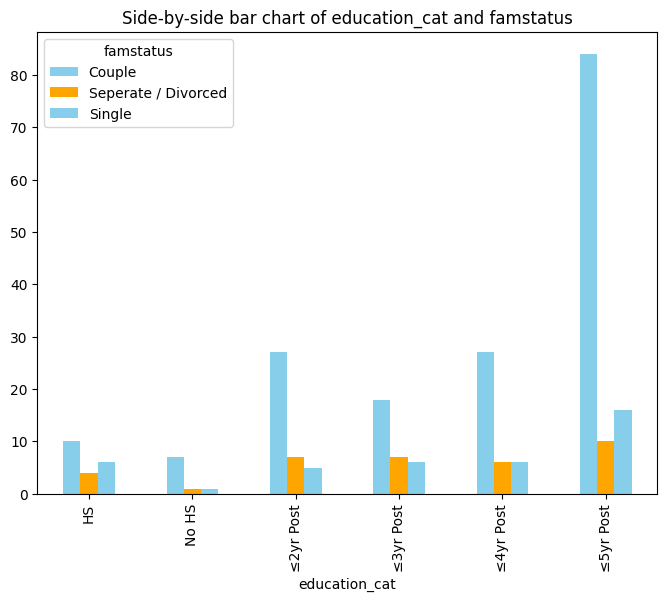

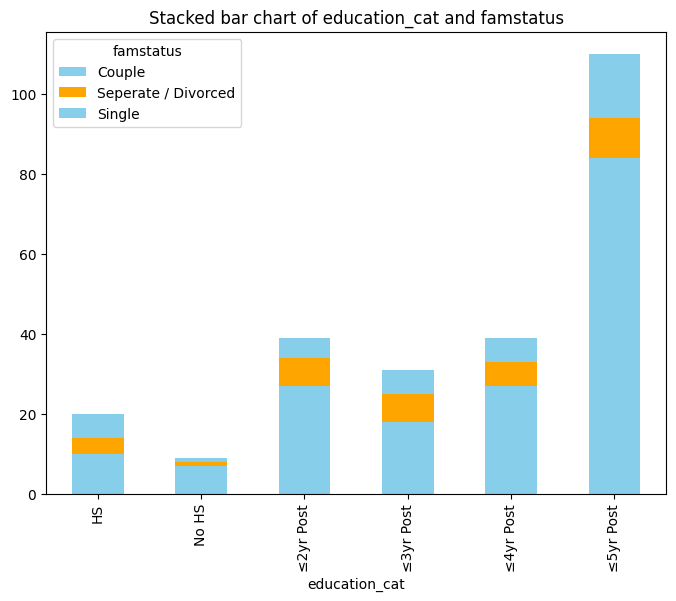

Analyzing education_cat and pro_cat (Both Categorical)
Contingency table:
pro_cat        Flourishing  Languishing  Moderately Mentally Healthy
education_cat                                                       
HS                       8            2                           10
No HS                    2            0                            7
≤2yr Post               11            6                           22
≤3yr Post                4            6                           21
≤4yr Post                9            4                           26
≤5yr Post               17           20                           73

Chi-square Test:
Chi2 Stat = 11.946738012092297, p-value = 0.28863694985085997

Cramer's V = 0.1551971821489046



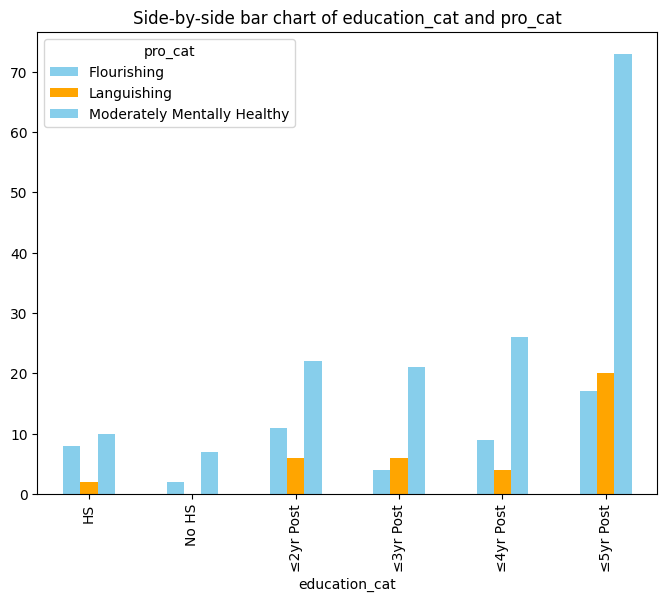

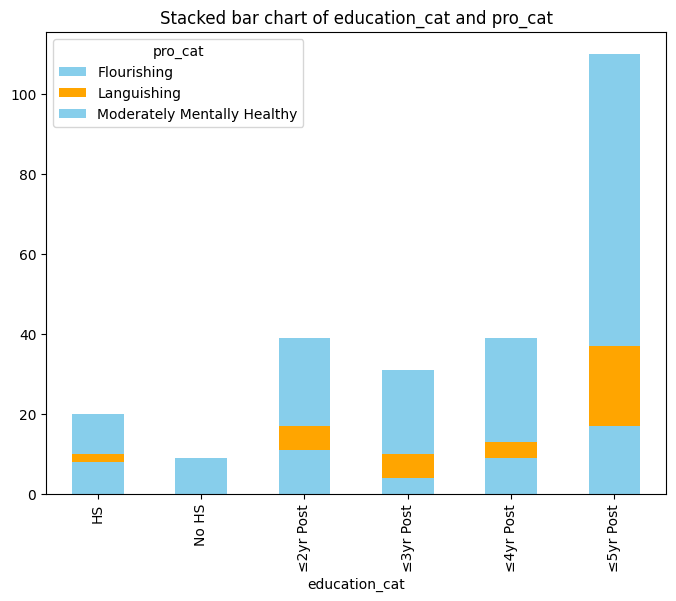

Analyzing education_cat and priv_cat (Both Categorical)
Contingency table:
priv_cat       Flourishing  Languishing  Moderately Mentally Healthy
education_cat                                                       
HS                      11            1                            8
No HS                    1            1                            7
≤2yr Post                9            2                           28
≤3yr Post               11            1                           19
≤4yr Post               10            2                           27
≤5yr Post               28            7                           75

Chi-square Test:
Chi2 Stat = 10.9753317685025, p-value = 0.3594431192191995

Cramer's V = 0.14875377311901078



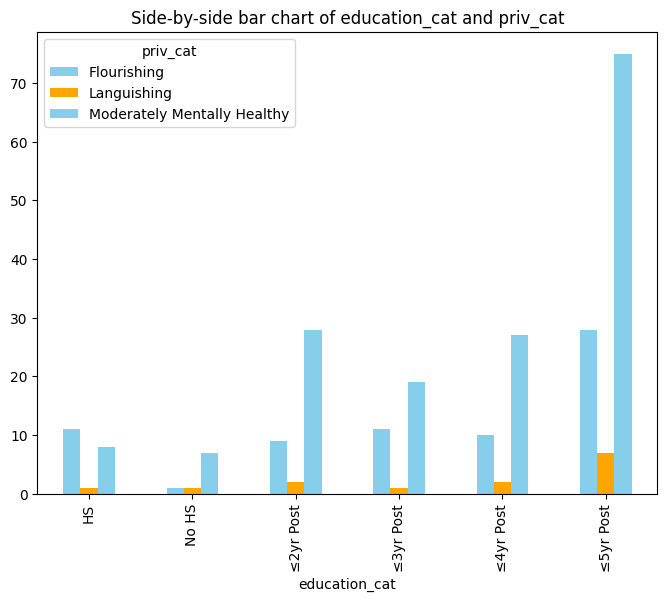

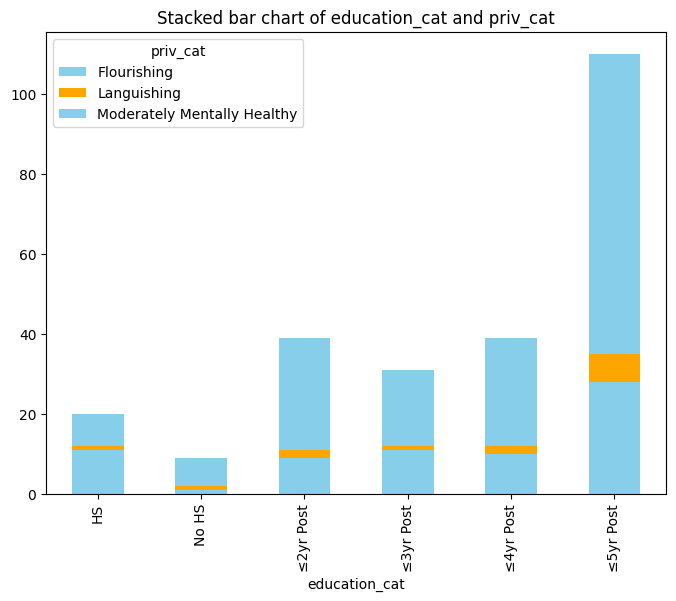

Analyzing education_cat and positivity (Both Categorical)
Contingency table:
positivity     depressed  emotionally flourishing  languishing  \
education_cat                                                    
HS                     2                        1           10   
No HS                  1                        1            4   
≤2yr Post              4                        1           26   
≤3yr Post              1                        2           14   
≤4yr Post              3                        5           24   
≤5yr Post             19                       10           70   

positivity     moderately emotionally healthy  
education_cat                                  
HS                                          7  
No HS                                       3  
≤2yr Post                                   8  
≤3yr Post                                  14  
≤4yr Post                                   7  
≤5yr Post                                  11  

Chi-squar

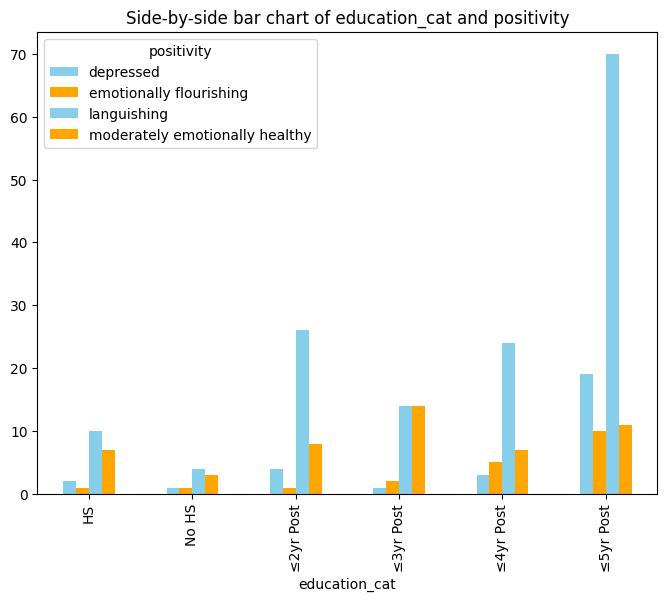

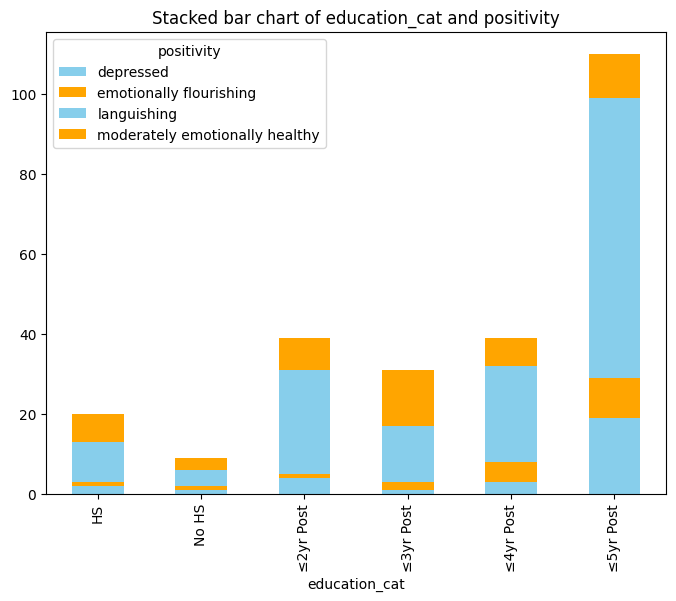

Analyzing sex and famstatus (Both Categorical)
Contingency table:
famstatus  Couple  Seperate / Divorced  Single
sex                                           
Female         99                   29      23
Male           74                    6      17

Chi-square Test:
Chi2 Stat = 8.26058510895296, p-value = 0.01607817439257878

Cramer's V = 0.18250701609307357



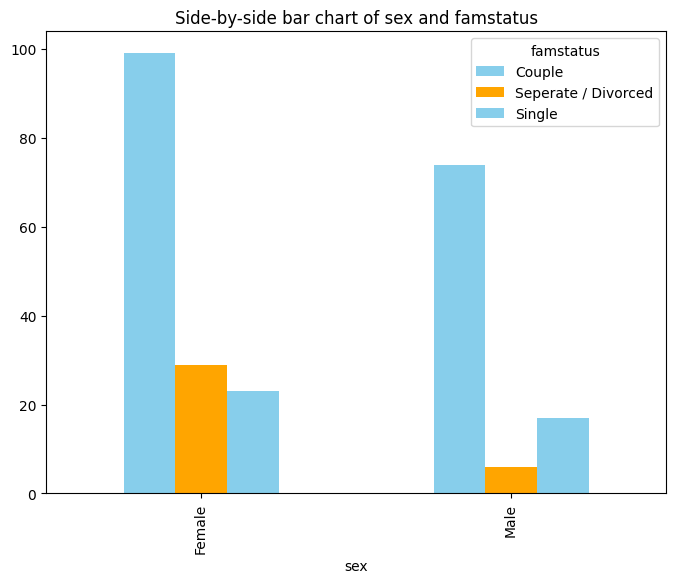

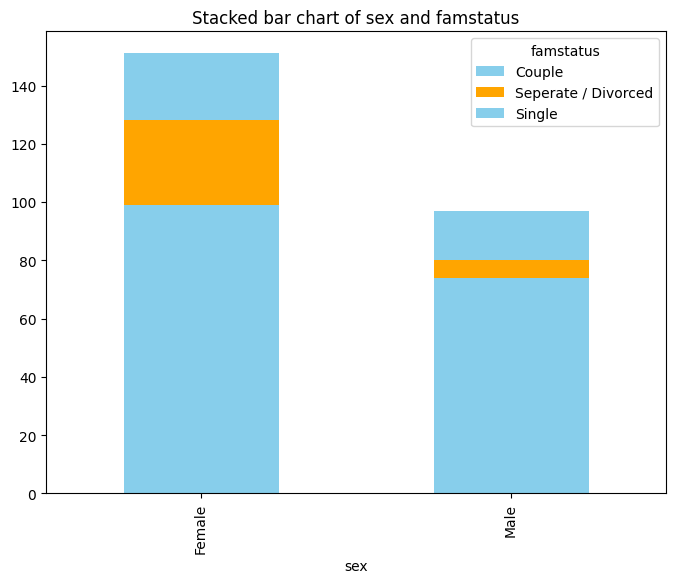

Analyzing sex and pro_cat (Both Categorical)
Contingency table:
pro_cat  Flourishing  Languishing  Moderately Mentally Healthy
sex                                                           
Female            29           24                           98
Male              22           14                           61

Chi-square Test:
Chi2 Stat = 0.4664780874312233, p-value = 0.7919642368215398

Cramer's V = 0.04337003608442827



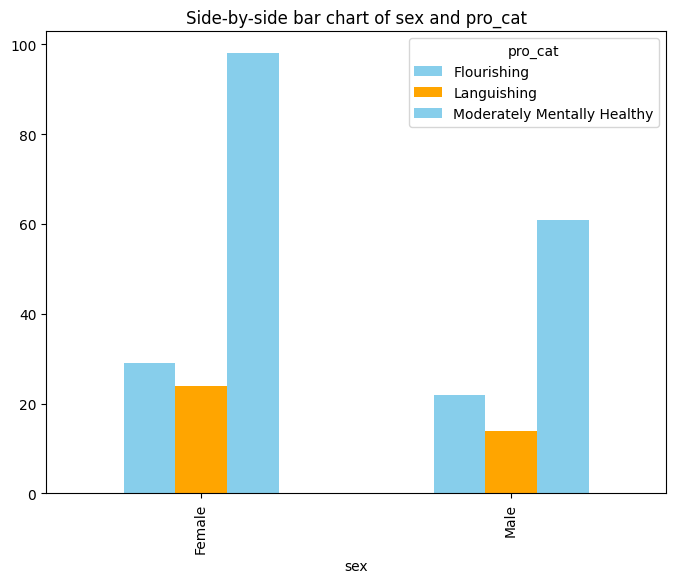

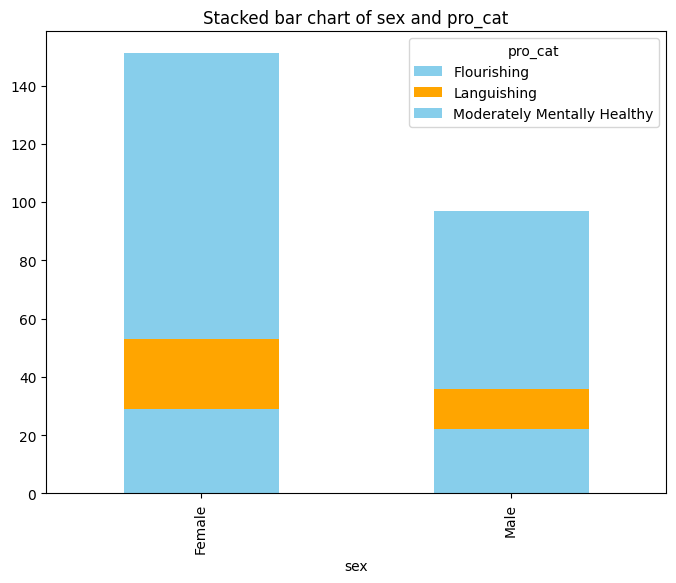

Analyzing sex and priv_cat (Both Categorical)
Contingency table:
priv_cat  Flourishing  Languishing  Moderately Mentally Healthy
sex                                                            
Female             41            7                          103
Male               29            7                           61

Chi-square Test:
Chi2 Stat = 1.1076933617115814, p-value = 0.5747347316719426

Cramer's V = 0.0668319196998897



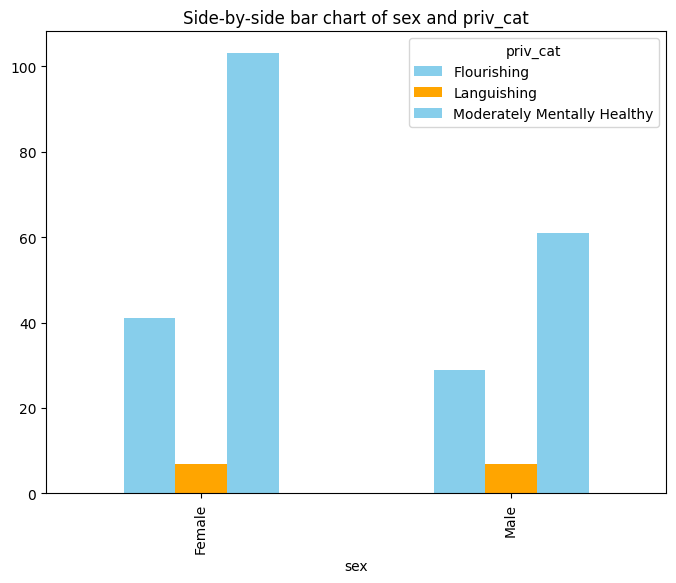

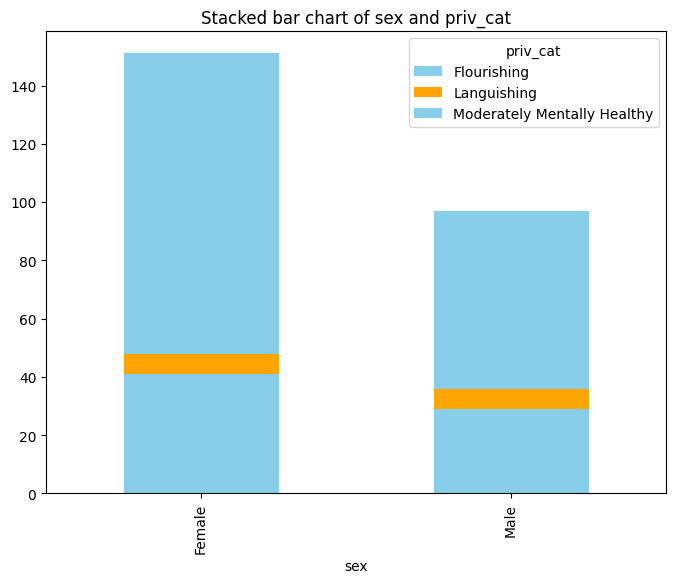

Analyzing sex and positivity (Both Categorical)
Contingency table:
positivity  depressed  emotionally flourishing  languishing  \
sex                                                           
Female             20                        8           93   
Male               10                       12           55   

positivity  moderately emotionally healthy  
sex                                         
Female                                  30  
Male                                    20  

Chi-square Test:
Chi2 Stat = 4.337681793215351, p-value = 0.22723375915738445

Cramer's V = 0.1322522301966866



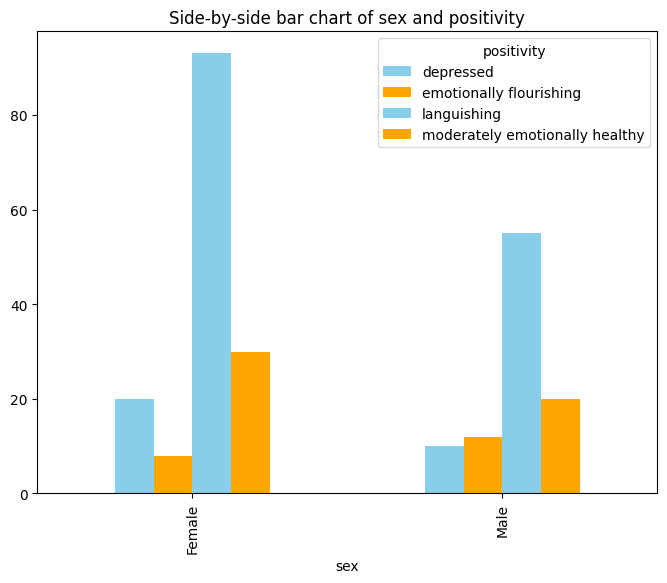

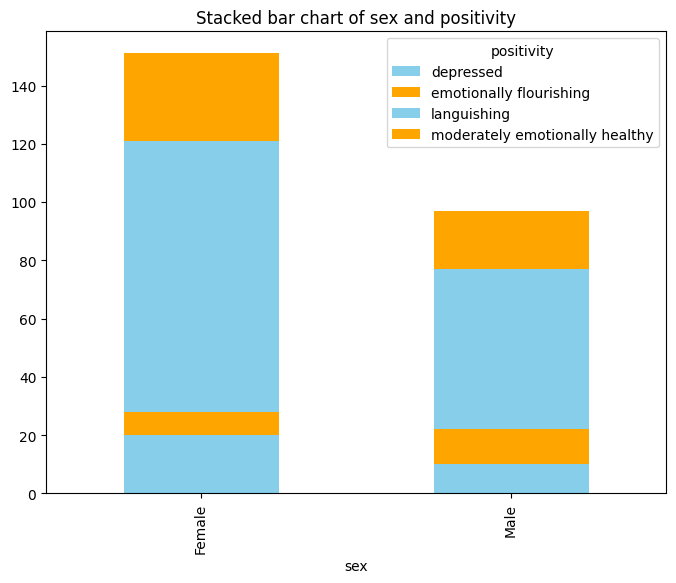

Analyzing famstatus and pro_cat (Both Categorical)
Contingency table:
pro_cat              Flourishing  Languishing  Moderately Mentally Healthy
famstatus                                                                 
Couple                        35           23                          115
Seperate / Divorced            6            8                           21
Single                        10            7                           23

Chi-square Test:
Chi2 Stat = 2.99164546865293, p-value = 0.5592244833296824

Cramer's V = 0.07766301103855332



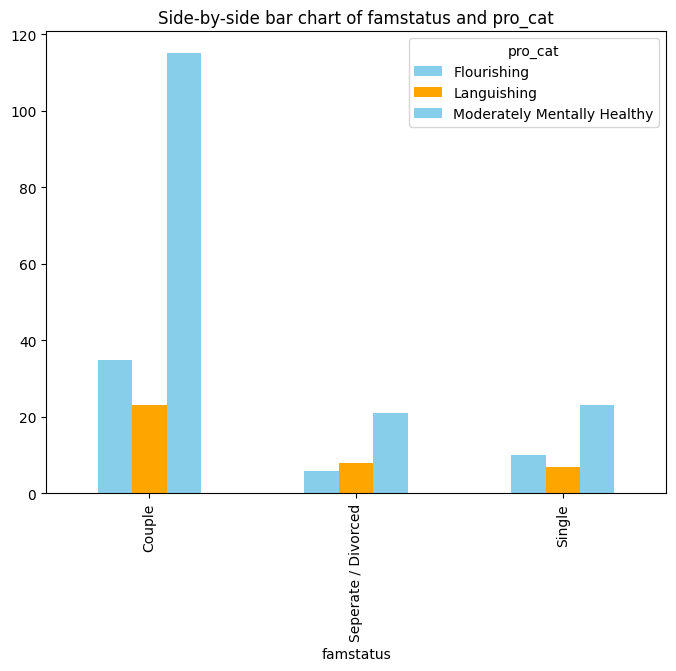

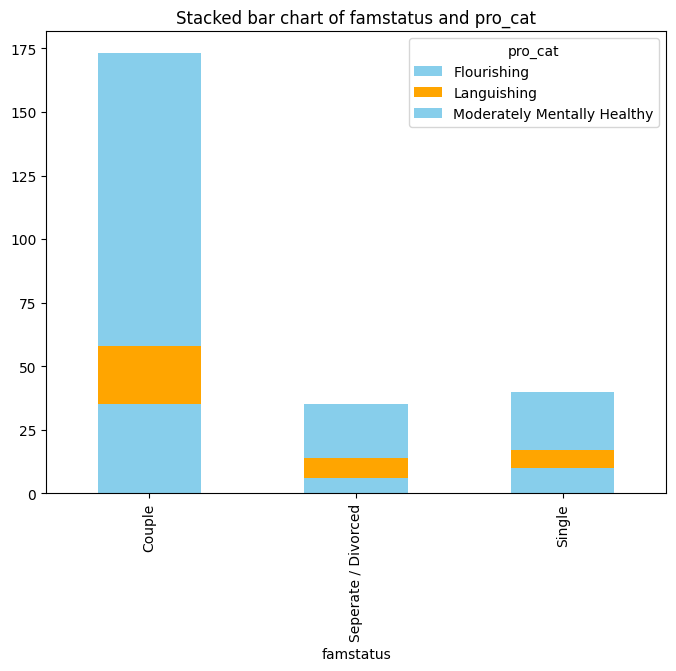

Analyzing famstatus and priv_cat (Both Categorical)
Contingency table:
priv_cat             Flourishing  Languishing  Moderately Mentally Healthy
famstatus                                                                 
Couple                        54            5                          114
Seperate / Divorced            7            3                           25
Single                         9            6                           25

Chi-square Test:
Chi2 Stat = 11.138439133724829, p-value = 0.02505142595276189

Cramer's V = 0.14985503165240063



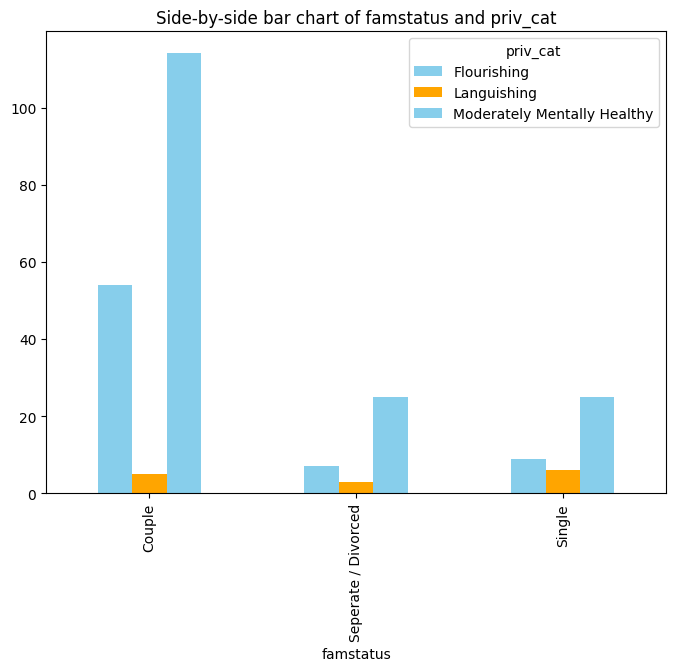

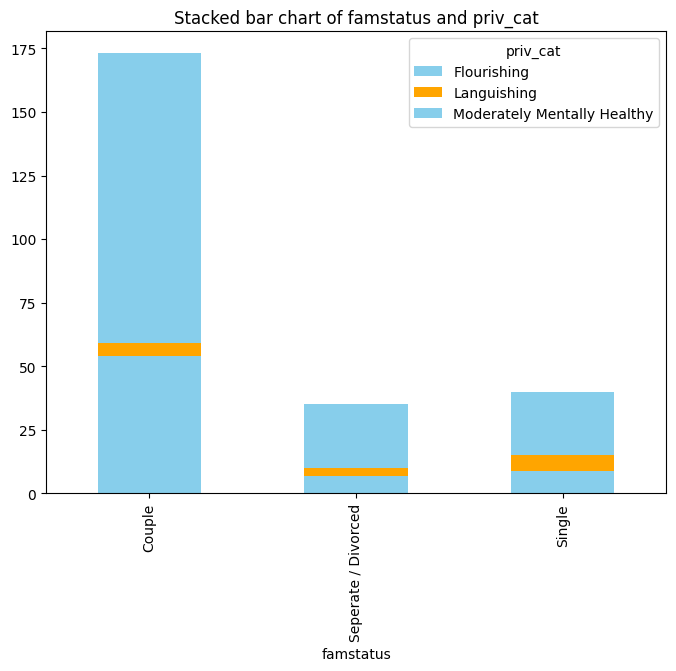

Analyzing famstatus and positivity (Both Categorical)
Contingency table:
positivity           depressed  emotionally flourishing  languishing  \
famstatus                                                              
Couple                      17                       15          104   
Seperate / Divorced          6                        3           21   
Single                       7                        2           23   

positivity           moderately emotionally healthy  
famstatus                                            
Couple                                           37  
Seperate / Divorced                               5  
Single                                            8  

Chi-square Test:
Chi2 Stat = 3.7616511259401433, p-value = 0.7088941145943431

Cramer's V = 0.08708601520470528



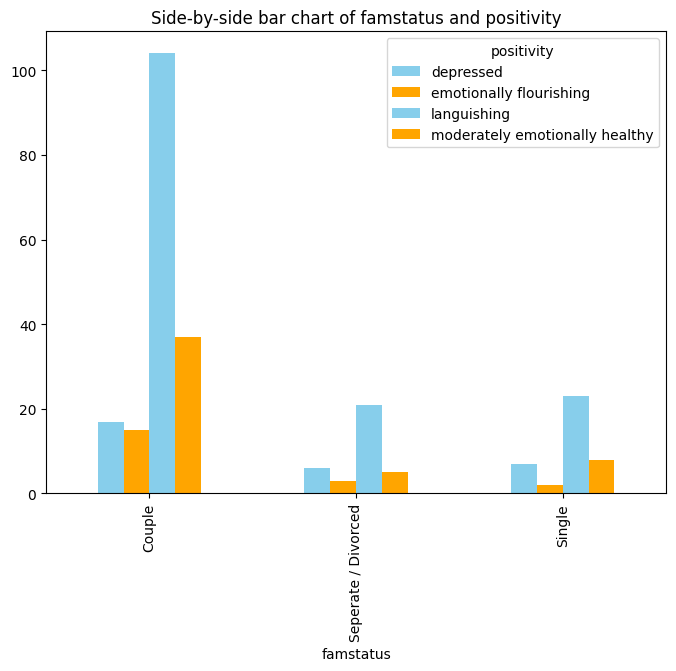

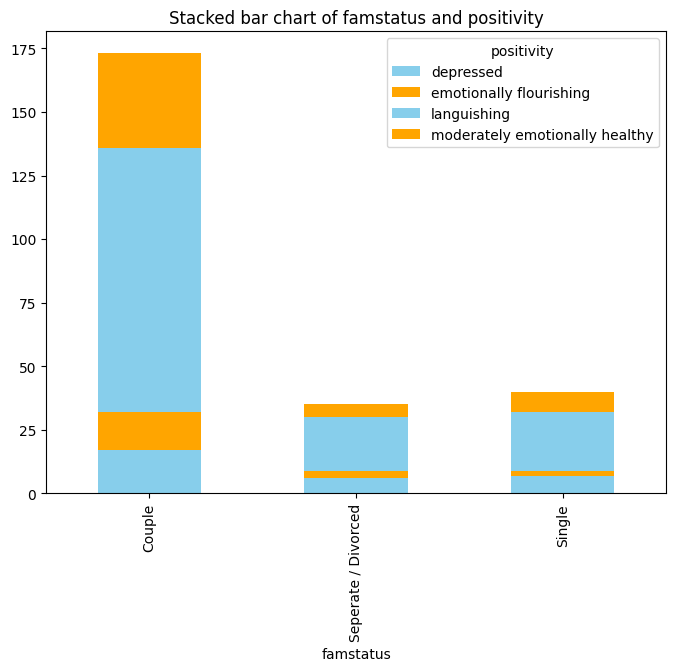

Analyzing pro_cat and priv_cat (Both Categorical)
Contingency table:
priv_cat                     Flourishing  Languishing  \
pro_cat                                                 
Flourishing                           35            1   
Languishing                            3            8   
Moderately Mentally Healthy           32            5   

priv_cat                     Moderately Mentally Healthy  
pro_cat                                                   
Flourishing                                           15  
Languishing                                           27  
Moderately Mentally Healthy                          122  

Chi-square Test:
Chi2 Stat = 70.95961781229556, p-value = 1.4235323065667048e-14

Cramer's V = 0.3782376839889246



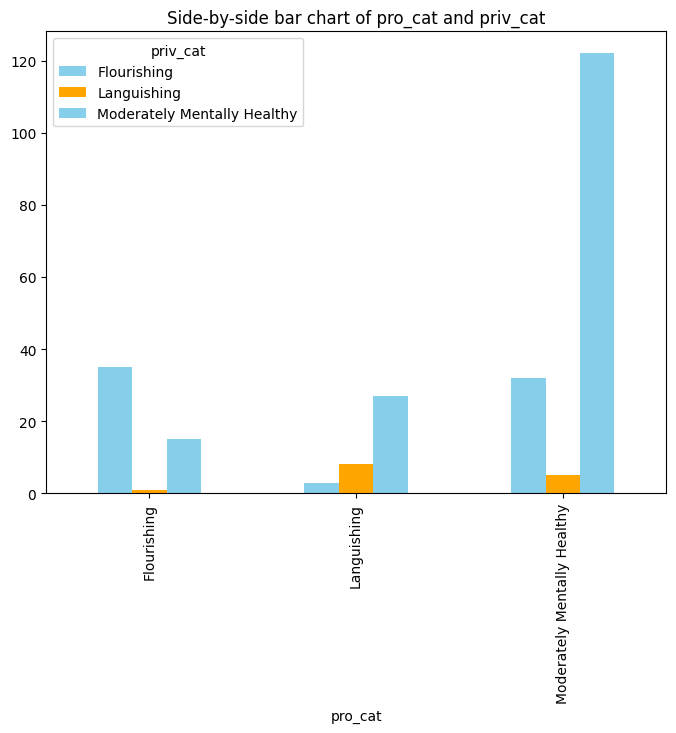

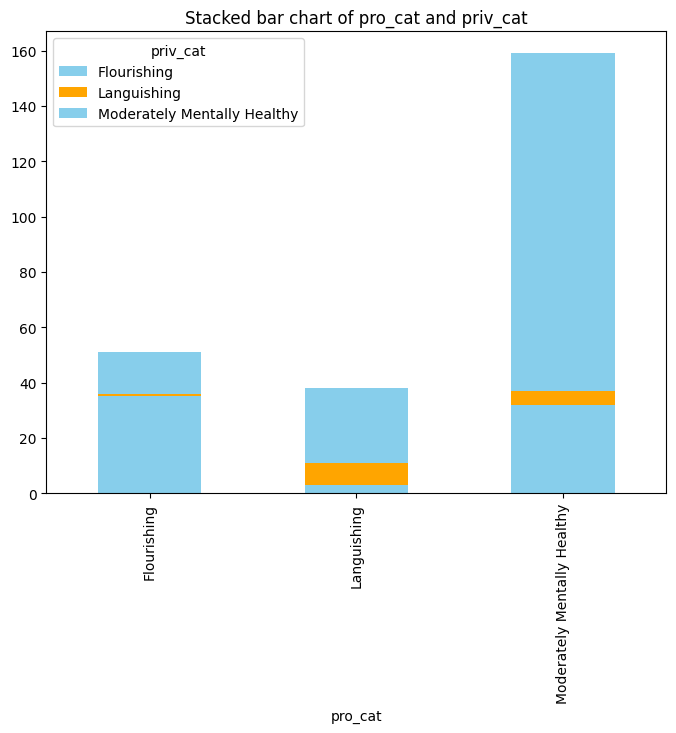

Analyzing pro_cat and positivity (Both Categorical)
Contingency table:
positivity                   depressed  emotionally flourishing  languishing  \
pro_cat                                                                        
Flourishing                          0                       11           14   
Languishing                         15                        1           21   
Moderately Mentally Healthy         15                        8          113   

positivity                   moderately emotionally healthy  
pro_cat                                                      
Flourishing                                              26  
Languishing                                               1  
Moderately Mentally Healthy                              23  

Chi-square Test:
Chi2 Stat = 90.21654468534776, p-value = 2.7318583029423383e-17

Cramer's V = 0.4264835224602899



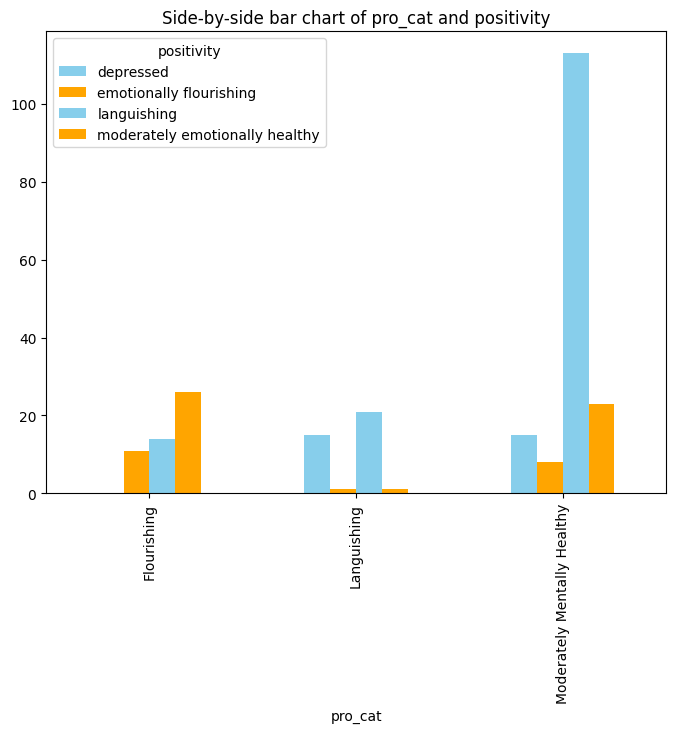

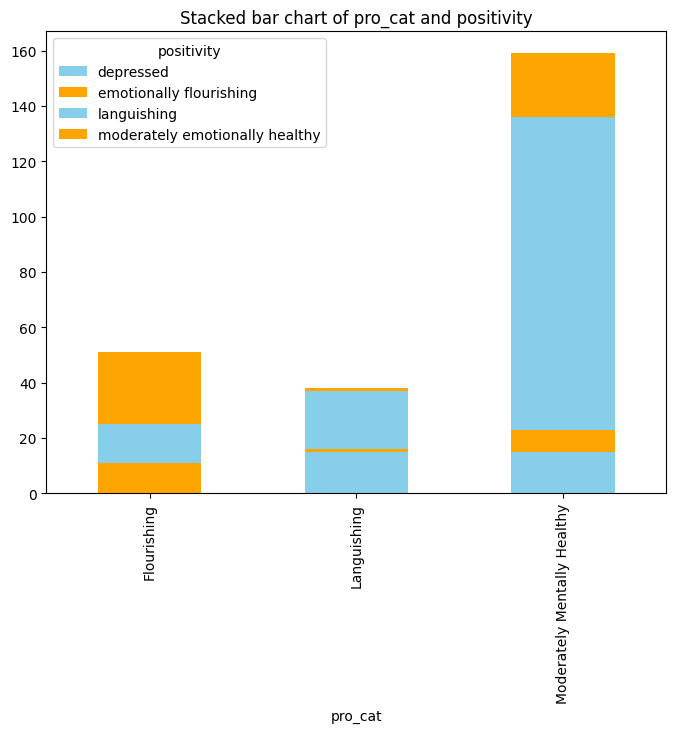

Analyzing priv_cat and positivity (Both Categorical)
Contingency table:
positivity                   depressed  emotionally flourishing  languishing  \
priv_cat                                                                       
Flourishing                          1                       11           28   
Languishing                          8                        0            5   
Moderately Mentally Healthy         21                        9          115   

positivity                   moderately emotionally healthy  
priv_cat                                                     
Flourishing                                              30  
Languishing                                               1  
Moderately Mentally Healthy                              19  

Chi-square Test:
Chi2 Stat = 71.62701949336096, p-value = 1.895374928162637e-13

Cramer's V = 0.38001225440066977



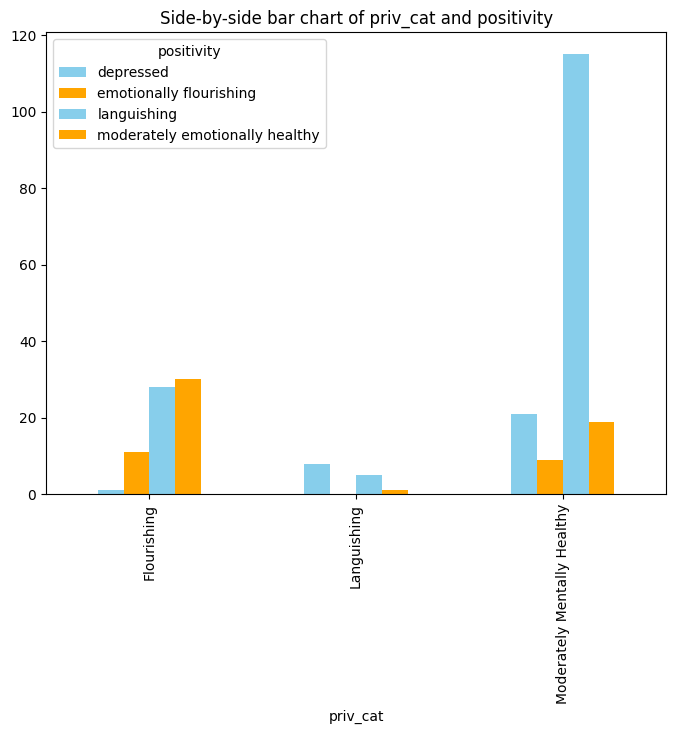

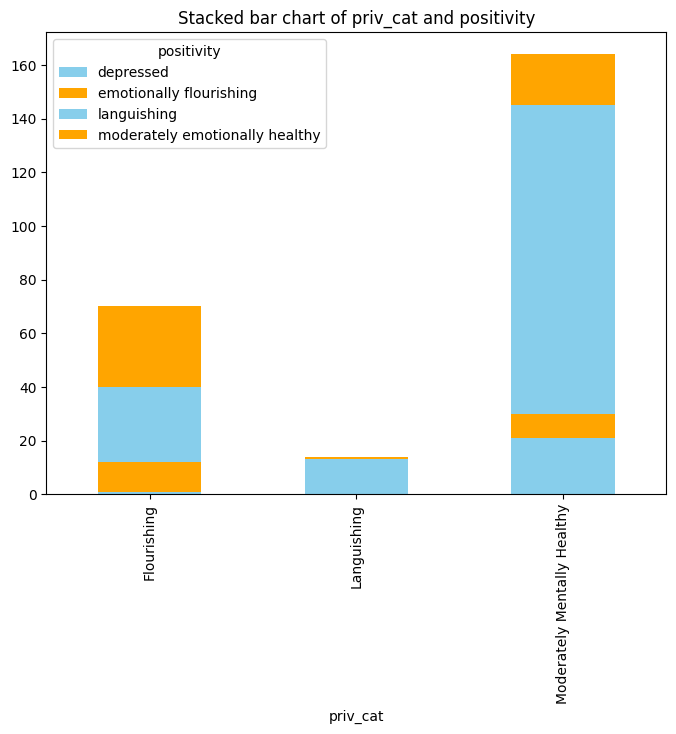

Analyzing age and pro_quant (Both Quantitative)
Correlation table:
                age  pro_quant
age        1.000000   0.229625
pro_quant  0.229625   1.000000

Pearson Correlation:
r = 0.22962490119377385, p-value = 0.0002656135100247766



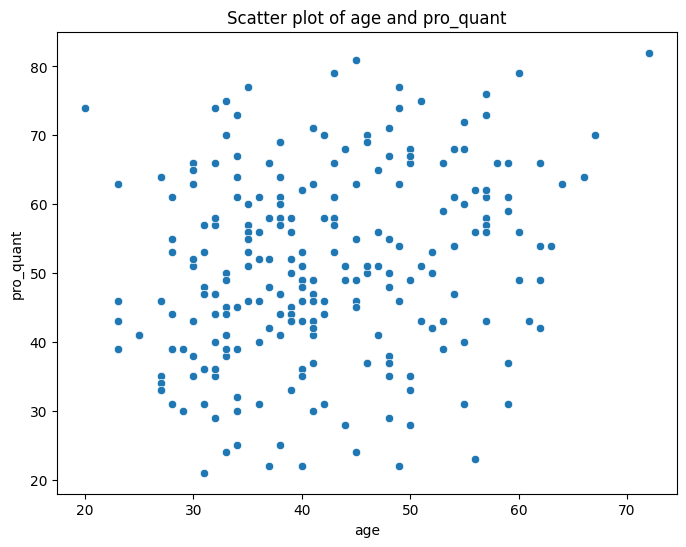

Analyzing age and priv_quant (Both Quantitative)
Correlation table:
                 age  priv_quant
age         1.000000    0.151607
priv_quant  0.151607    1.000000

Pearson Correlation:
r = 0.1516065782975749, p-value = 0.016881986118607358



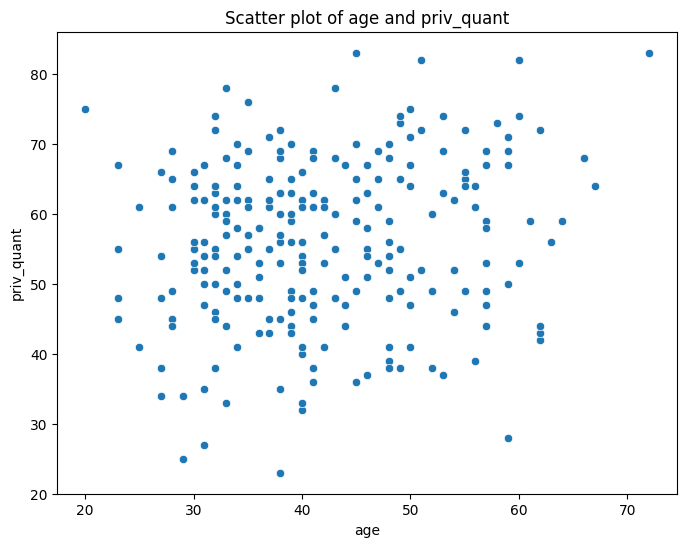

Analyzing age and flow (Both Quantitative)
Correlation table:
           age      flow
age   1.000000  0.367994
flow  0.367994  1.000000

Pearson Correlation:
r = 0.3679939810184852, p-value = 2.2735848758952843e-09



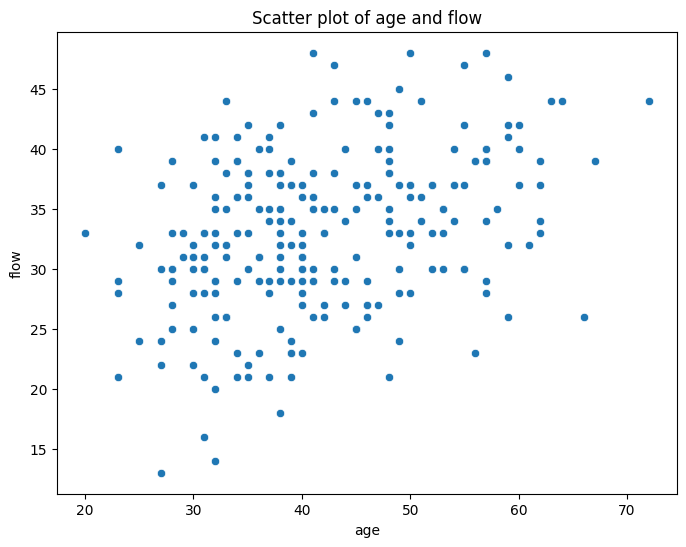

Analyzing pro_quant and priv_quant (Both Quantitative)
Correlation table:
            pro_quant  priv_quant
pro_quant    1.000000    0.635679
priv_quant   0.635679    1.000000

Pearson Correlation:
r = 0.6356793105641754, p-value = 1.7686137882164033e-29



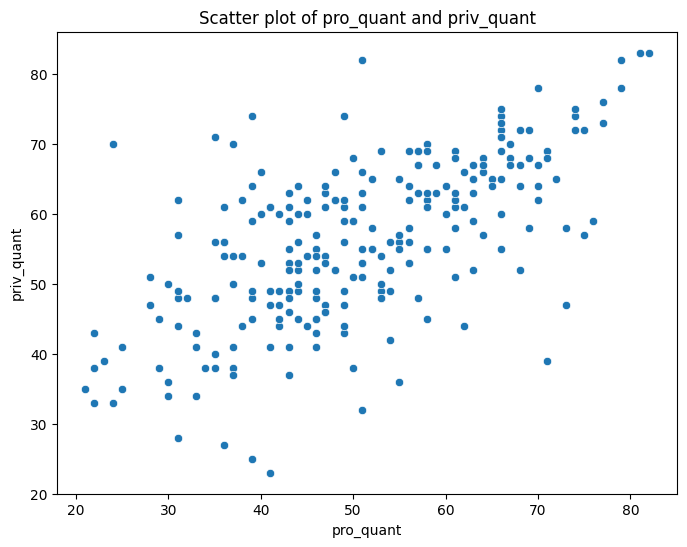

Analyzing pro_quant and flow (Both Quantitative)
Correlation table:
           pro_quant      flow
pro_quant   1.000000  0.536229
flow        0.536229  1.000000

Pearson Correlation:
r = 0.5362292444060371, p-value = 7.275264895390285e-20



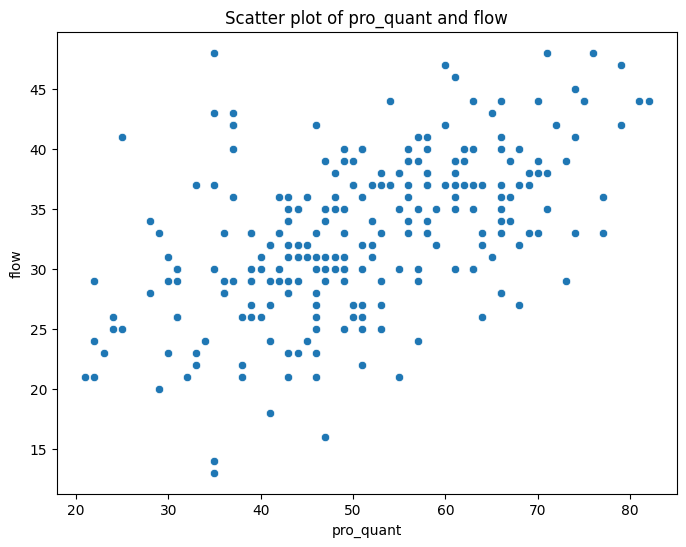

Analyzing priv_quant and flow (Both Quantitative)
Correlation table:
            priv_quant      flow
priv_quant    1.000000  0.409439
flow          0.409439  1.000000

Pearson Correlation:
r = 0.4094387267188061, p-value = 1.9222714486707287e-11



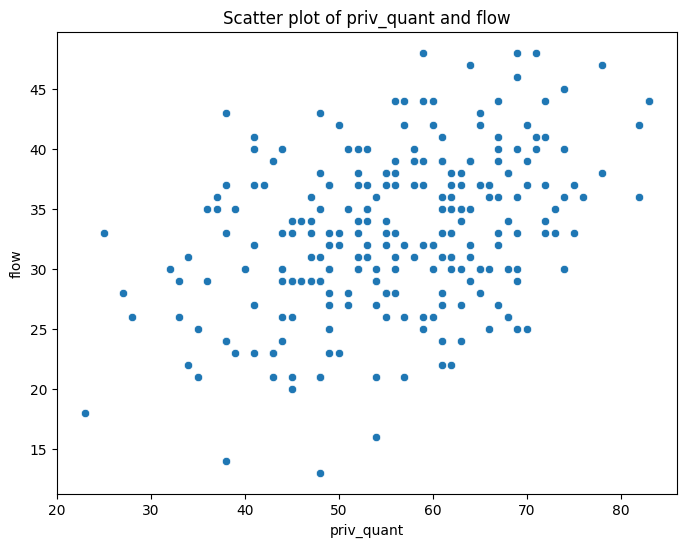

In [60]:
def bivariate_analysis(data, num_vars, cat_vars):
    # Mixed - One categorical and one quantitative variable
    for var1 in cat_vars:
        for var2 in num_vars:
            if (var1 != "education_cat") and (var2 != "education_num"):
              print(f"Analyzing {var1} and {var2} (Mixed Categorical & Quantitative)")

              #ANOVA
              groups = [data[var2][data[var1] == category] for category in data[var1].unique()]
              f_stat, p_val = f_oneway(*groups)
              print(f"ANOVA:\nF-statistic = {f_stat}, p-value = {p_val}\n")

              #group means
              group_means = data.groupby(var1)[var2].mean()
              print(f"Group means:\n{group_means}\n")

              #grouped boxplot
              plt.figure(figsize=(8, 6))
              sns.boxplot(x=data[var1], y=data[var2])
              plt.title(f'Grouped boxplot of {var2} by {var1}')
              plt.show()

    # Both variables are categorical
    for i in range(len(cat_vars)):
        for j in range(i + 1, len(cat_vars)):
            var1 = cat_vars[i]
            var2 = cat_vars[j]
            print(f"Analyzing {var1} and {var2} (Both Categorical)")

            #contingency table
            contingency_table = pd.crosstab(data[var1], data[var2])
            print(f"Contingency table:\n{contingency_table}\n")

            #chi-square test
            chi2_stat, p_val, dof, expected = chi2_contingency(contingency_table)
            print(f"Chi-square Test:\nChi2 Stat = {chi2_stat}, p-value = {p_val}\n")

            #cramer's V
            n = data.shape[0]
            cramer_v = np.sqrt(chi2_stat / (n * (min(contingency_table.shape) - 1)))
            print(f"Cramer's V = {cramer_v}\n")

            #side-by-side bar chart
            contingency_table.plot(kind='bar', stacked=False, figsize=(8, 6), color=['skyblue', 'orange'])
            plt.title(f'Side-by-side bar chart of {var1} and {var2}')
            plt.show()

            #stacked bar chart
            contingency_table.plot(kind='bar', stacked=True, figsize=(8, 6), color=['skyblue', 'orange'])
            plt.title(f'Stacked bar chart of {var1} and {var2}')
            plt.show()

    # Both variables are quantitative
    for i in range(len(num_vars)):
        for j in range(i + 1, len(num_vars)):
          if (num_vars[i] != "education_num") and (num_vars[j] != "education_num"):
            var1 = num_vars[i]
            var2 = num_vars[j]
            print(f"Analyzing {var1} and {var2} (Both Quantitative)")

            #correlation table
            corr = data[[var1, var2]].corr()
            print(f"Correlation table:\n{corr}\n")

            #r-value
            r_val, p_val = pearsonr(data[var1], data[var2])
            print(f"Pearson Correlation:\nr = {r_val}, p-value = {p_val}\n")

            #scatterplot
            plt.figure(figsize=(8, 6))
            sns.scatterplot(x=data[var1], y=data[var2])
            plt.title(f'Scatter plot of {var1} and {var2}')
            plt.show()

bivariate_analysis(df, num_vars, cat_vars)

**ANOVA significance :** famstatus and age, famstatus and priv_quant, pro_cat and age, pro_cat and pro_quant, pro_cat and priv_quant, pro_cat and flow, priv_cat and age, priv_cat and pro_quant, priv_cat and priv_quant, priv_cat and flow, positivity and age, positivity and pro_quant, positivity and priv_quant, positivity and flow.

**Contingency significance:** education_cat and positivity, famstatus and priv_cat, pro_cat and priv_cat, pro_cat and positivity, priv_cat and positivity.

**Pearson significance:** age and pro_quant (r = 0.229), age and priv_quant (r  = 0.15), age and flow (r = 0.367), pro_quant and priv_quant (r = 0.63), pro_quant and flow (r = 0.53), priv_quant and flow (r = 0.4).

***Both Flow and Positivity are critical for understanding employee engagement and well-being. They directly impact a big number of our variables, making them valuable outcome variables for the study.***

### We check for multicolinearity across all variables

In [61]:
df_encoded = pd.get_dummies(df, columns=['positivity', 'famstatus', 'priv_cat', 'pro_cat', 'sex'], drop_first=True)
df_encoded.drop(columns=["education_cat"], inplace=True)

X = df_encoded.apply(lambda x: x.astype(int) if x.dtype == 'bool' else x)

X = sm.add_constant(X)

vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)

                                     Variable         VIF
0                                       const  242.651904
1                                         age    1.378071
2                               education_num    1.127082
3                                   pro_quant    4.914970
4                                  priv_quant    3.782673
5                                        flow    1.718781
6          positivity_emotionally flourishing    2.355276
7                      positivity_languishing    3.086221
8   positivity_moderately emotionally healthy    3.430544
9               famstatus_Seperate / Divorced    1.228426
10                           famstatus_Single    1.145325
11                       priv_cat_Languishing    2.616437
12       priv_cat_Moderately Mentally Healthy    2.458096
13                        pro_cat_Languishing    5.590338
14        pro_cat_Moderately Mentally Healthy    3.640833
15                                   sex_Male    1.090992


**Most of the variables have manageable VIF scores; therefore, we will proceed with modeling without making adjustments for multicollinearity.**


In [62]:
categories = ['depressed', 'languishing', 'moderately emotionally healthy', 'emotionally flourishing']

cohen_results = {}

# Iterate through all combinations of categories to calculate Cohen's d
for i in range(len(categories)):
    for j in range(i + 1, len(categories)):
        group1 = df[df['positivity'] == categories[i]]['flow']
        group2 = df[df['positivity'] == categories[j]]['flow']

        cohens_d = pg.compute_effsize(group1, group2, eftype='cohen')

        cohen_results[(categories[i], categories[j])] = cohens_d

for (cat1, cat2), effect_size in cohen_results.items():
    print(f"Cohen's d between {cat1} and {cat2}: {effect_size:.4f}")

Cohen's d between depressed and languishing: -0.8301
Cohen's d between depressed and moderately emotionally healthy: -1.4993
Cohen's d between depressed and emotionally flourishing: -1.8399
Cohen's d between languishing and moderately emotionally healthy: -0.6873
Cohen's d between languishing and emotionally flourishing: -1.0186
Cohen's d between moderately emotionally healthy and emotionally flourishing: -0.3280


**We tried to determine which OneHotEncoded variable among the positivity variables had the highest Cohen's d. However, using this variable in the next models actually reduced the adjusted R-squared, so we removed it.**

# ***Part IV  - Modeling***

### Supervised on quantitative var

**Given the results of the prior correlation, we will use age and flow (r = 0.367), pro_quant and flow (r = 0.53), positivity and flow, and priv_quant and flow (r = 0.4) as predictors**

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 248 entries, 344 to 26
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            248 non-null    int64 
 1   education_num  248 non-null    int64 
 2   sex            248 non-null    object
 3   famstatus      248 non-null    object
 4   pro_cat        248 non-null    object
 5   pro_quant      248 non-null    int64 
 6   priv_cat       248 non-null    object
 7   priv_quant     248 non-null    int64 
 8   positivity     248 non-null    object
 9   flow           248 non-null    int64 
 10  education_cat  248 non-null    object
dtypes: int64(5), object(6)
memory usage: 23.2+ KB


In [64]:
X = df[["age", "pro_quant", "priv_quant"]]
y = df["flow"]

X = pd.get_dummies(X, drop_first=True)
X = X.apply(lambda x: x.astype(int) if x.dtype == 'bool' else x)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model_linear = LinearRegression()
model_linear.fit(X_train_scaled, y_train)

y_pred_linear = model_linear.predict(X_test_scaled)

r2_linear = r2_score(y_test, y_pred_linear)
n_linear = len(y_test)
p_linear = X.shape[1]
rmse_linear_value = np.sqrt(mean_squared_error(y_test, y_pred_linear))

#function to calculate adjusted R²
def adjusted_r2(r2, n, p):
    return 1 - ((1 - r2) * (n - 1)) / (n - p - 1)

r2_adj_linear = adjusted_r2(r2_linear, n_linear, p_linear)
rmse_normalized_linear = rmse_linear_value / np.mean(y_test)

print(f"Linear Regression Adjusted R² (sklearn): {r2_adj_linear:.4f}")
print(f"Linear Regression RMSE/y_mean (sklearn): {rmse_normalized_linear:.4f}")

# Statsmodels OLS regression
X_with_const = sm.add_constant(X_train_scaled)
model_sm = sm.OLS(y_train, X_with_const).fit()

print(model_sm.summary())

Linear Regression Adjusted R² (sklearn): 0.3121
Linear Regression RMSE/y_mean (sklearn): 0.1584
                            OLS Regression Results                            
Dep. Variable:                   flow   R-squared:                       0.357
Model:                            OLS   Adj. R-squared:                  0.347
Method:                 Least Squares   F-statistic:                     35.86
Date:                Sun, 13 Oct 2024   Prob (F-statistic):           1.75e-18
Time:                        20:47:12   Log-Likelihood:                -609.92
No. Observations:                 198   AIC:                             1228.
Df Residuals:                     194   BIC:                             1241.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------

In [65]:
model_knn = KNeighborsRegressor()

model_knn.fit(X_train_scaled, y_train)

y_pred_knn = model_knn.predict(X_test_scaled)

r2_knn = r2_score(y_test, y_pred_knn)
n_knn = len(y_test)
p_knn = X.shape[1]
rmse_knn_value = np.sqrt(mean_squared_error(y_test, y_pred_knn))

r2_adj_knn = adjusted_r2(r2_knn, n_knn, p_knn)

rmse_normalized_knn = rmse_knn_value / np.mean(y_test)

print(f"KNN Regression Adjusted R²: {r2_adj_knn:.4f}")
print(f"KNN Regression RMSE/y_mean: {rmse_normalized_knn:.4f}")

KNN Regression Adjusted R²: 0.2197
KNN Regression RMSE/y_mean: 0.1687


**Results:** The linear regression model appears to fit the dataset better, as indicated by a higher adjusted R² and a slightly lower RMSE relative to the mean of
𝑦.

### Supervised on categorical var

positivity and age, positivity and pro_quant, positivity and priv_quant, positivity and flow, education_cat and positivity, pro_cat and positivity, priv_cat and positivity.

In [66]:
X = df[["age", "pro_quant", "priv_quant", "flow", "education_cat"]]
y = df["positivity"]

X = pd.get_dummies(X, drop_first=True)
X = X.apply(lambda x: x.astype(int) if x.dtype == 'bool' else x)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

log_model = LogisticRegression(max_iter=2000, multi_class='multinomial')
log_model.fit(X_train_scaled, y_train)

y_pred_log = log_model.predict(X_test_scaled)

print("Logistic Regression Results:")
print(classification_report(y_test, y_pred_log))
print(f"Accuracy: {accuracy_score(y_test, y_pred_log):.4f}")

Logistic Regression Results:
                                precision    recall  f1-score   support

                     depressed       0.50      0.67      0.57         3
       emotionally flourishing       0.67      0.50      0.57         4
                   languishing       0.85      0.82      0.84        34
moderately emotionally healthy       0.50      0.56      0.53         9

                      accuracy                           0.74        50
                     macro avg       0.63      0.64      0.63        50
                  weighted avg       0.75      0.74      0.74        50

Accuracy: 0.7400


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


In [67]:
X = df[["age", "pro_quant", "priv_quant", "flow", "education_cat"]]
y = df["positivity"]

X = pd.get_dummies(X, drop_first=True)
X = X.apply(lambda x: x.astype(int) if x.dtype == 'bool' else x)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

best_n_neighbors = None
best_accuracy = 0
results = {}

#loop through a range of n_neighbors to determine the best one
for n_neighbors in range(1, 21):
    knn_model = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn_model.fit(X_train_scaled, y_train)

    y_pred_knn = knn_model.predict(X_test_scaled)

    accuracy = accuracy_score(y_test, y_pred_knn)
    results[n_neighbors] = accuracy

    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_n_neighbors = n_neighbors

print("KNN Classifier Results:")
print(f"Best n_neighbors: {best_n_neighbors} with Accuracy: {best_accuracy:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred_knn))

KNN Classifier Results:
Best n_neighbors: 5 with Accuracy: 0.7400

Classification Report:
                                precision    recall  f1-score   support

                     depressed       0.00      0.00      0.00         3
       emotionally flourishing       1.00      0.25      0.40         4
                   languishing       0.71      1.00      0.83        34
moderately emotionally healthy       1.00      0.11      0.20         9

                      accuracy                           0.72        50
                     macro avg       0.68      0.34      0.36        50
                  weighted avg       0.74      0.72      0.63        50



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


**Result:** Estimating the categorical variable of positivity appears to be more accurate. The logistic regression model seems to perform better than the KNN classifier in terms of macro average and weighted average score.

### Unsupervised learning on the variables (columns): PCA

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 248 entries, 344 to 26
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            248 non-null    int64 
 1   education_num  248 non-null    int64 
 2   sex            248 non-null    object
 3   famstatus      248 non-null    object
 4   pro_cat        248 non-null    object
 5   pro_quant      248 non-null    int64 
 6   priv_cat       248 non-null    object
 7   priv_quant     248 non-null    int64 
 8   positivity     248 non-null    object
 9   flow           248 non-null    int64 
 10  education_cat  248 non-null    object
dtypes: int64(5), object(6)
memory usage: 23.2+ KB


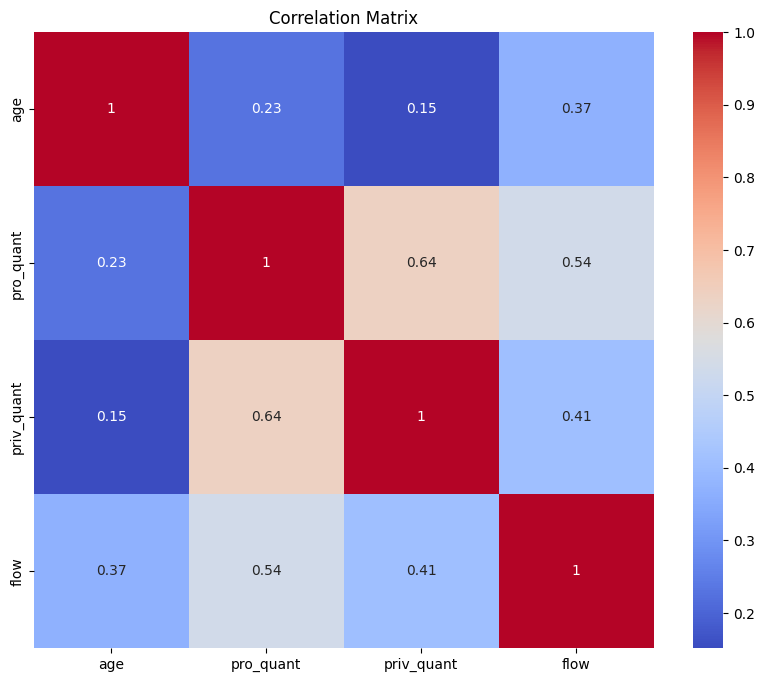

Bartlett's test of sphericity: Chi-square = 248.66995021934687, p-value = 7.891301024412427e-51
KMO Measure of Sampling Adequacy: 0.6707874102781658
  Principal Component  Variance Explained (%)  Cumulative Variance (%)
0                 PC1               55.292965                55.292965
1                 PC2               23.235557                78.528521


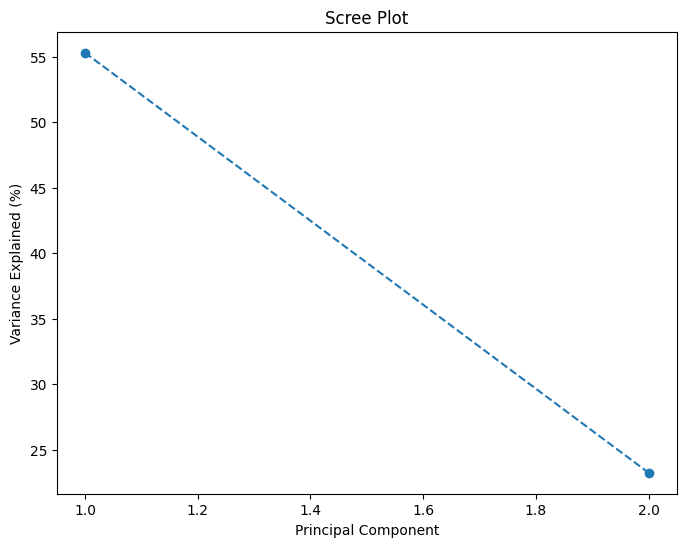

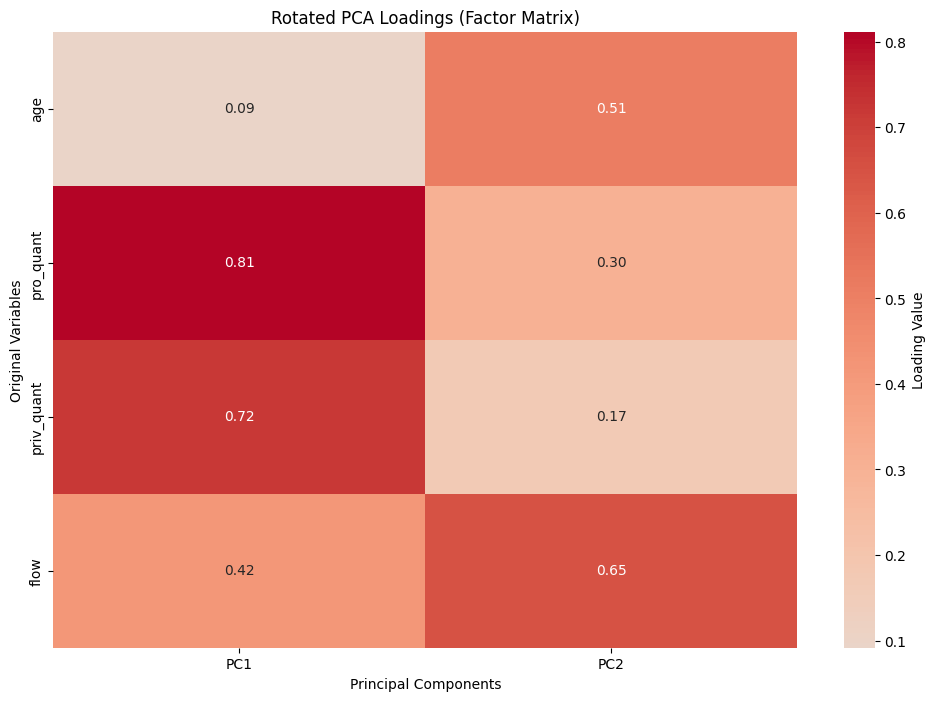

In [69]:
df_dummies = df.copy().drop(columns=["education_num", "sex", "famstatus", "pro_cat", "priv_cat", "positivity", "education_cat"])

df_dummies = pd.get_dummies(df_dummies).astype(int)

df_dummies = df_dummies.loc[:, df_dummies.var() > 0]

scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_dummies)

#correlation matrix (> 0.3)
plt.figure(figsize=(10, 8))
sns.heatmap(pd.DataFrame(scaled_data, columns=df_dummies.columns).corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
#plt.savefig('corr_matrix.png', bbox_inches='tight', pad_inches=0)
plt.show()

#bartlett's test of sphericity (rejet H0)
bartlett_test, bartlett_p_value = calculate_bartlett_sphericity(scaled_data)
print(f"Bartlett's test of sphericity: Chi-square = {bartlett_test}, p-value = {bartlett_p_value}")

#KMO close to 1
kmo_all, kmo_model = calculate_kmo(scaled_data)
print(f"KMO Measure of Sampling Adequacy: {kmo_model}")

#Total Variance Explained Table using PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_data)
explained_variance_ratio = pca.explained_variance_ratio_

total_variance_explained = pd.DataFrame({
    'Principal Component': [f'PC{i+1}' for i in range(len(explained_variance_ratio))],
    'Variance Explained (%)': explained_variance_ratio * 100,
    'Cumulative Variance (%)': np.cumsum(explained_variance_ratio) * 100
})

print(total_variance_explained)

#scree plot
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio * 100, marker='o', linestyle='--')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained (%)')
plt.show()

#PCA
loadings = pd.DataFrame(pca.components_.T, columns=[f'PC{i+1}' for i in range(pca.n_components_)], index=df_dummies.columns)

#Varimax
fa = FactorAnalyzer(n_factors=2, rotation='varimax')
fa.fit(scaled_data)
rotated_loadings = fa.loadings_

#rotated loadings
rotated_loadings_df = pd.DataFrame(rotated_loadings, index=df_dummies.columns, columns=[f'PC{i+1}' for i in range(rotated_loadings.shape[1])])

plt.figure(figsize=(12, 8))
sns.heatmap(rotated_loadings_df, annot=True, fmt=".2f", cmap='coolwarm', center=0, cbar_kws={'label': 'Loading Value'})
plt.title('Rotated PCA Loadings (Factor Matrix)')
plt.xlabel('Principal Components')
plt.ylabel('Original Variables')
plt.show()

**Results:** We conducted PCA before applying K-means clustering to determine which variables to use for creating clusters. We observed some trends associated with age, pro_quant, priv_quant, and flow.

### Unsupervised learning on the observations (rows): Use the variable obtained from PCA on KMEANs

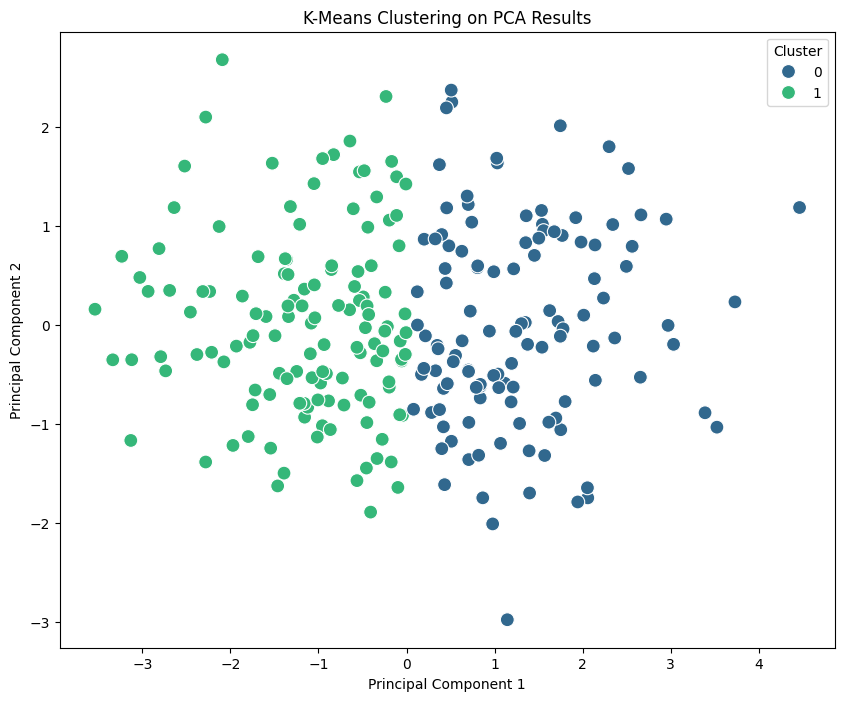

In [70]:
n_clusters = 2
kmeans = KMeans(n_clusters=n_clusters, random_state=0)
kmeans.fit(principal_components)

labels = kmeans.labels_

principal_components_df = pd.DataFrame(principal_components, columns=['PC1', 'PC2'])
principal_components_df['Cluster'] = labels

plt.figure(figsize=(10, 8))
sns.scatterplot(data=principal_components_df, x='PC1', y='PC2', hue='Cluster', palette='viridis', s=100)
plt.title('K-Means Clustering on PCA Results')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
#plt.savefig('KMeans.png', bbox_inches='tight', pad_inches=0)
plt.show()